In [1]:
# imports 

import numpy as np 
import pandas as pd 

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

This dataset contains roughly 300 observations on heart attack risk evaluated by experts as either high or normal, and numerous risk factors for heart attack. The risk factors are explained below. 

dataset pulled from kaggle : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [2]:
# get the dataset in 

raw_df = pd.read_csv(r'C:\Users\Devin\desktop\thinkful\capstone3\archive\heart.csv')

In [3]:
#inspect 

raw_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Metadata on the dataset 

AGE : Age of the patient


SEX : Sex of the patient


CP: Chest Pain type chest pain type
Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
 chest pain related to angina. Angina is chest pain caused by reduced bloodflow to the heart https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373).  


TRTBPS : resting blood pressure (in mm Hg)


CHOL : cholestoral in mg/dl fetched via BMI sensor. Cholesterol is a wazy molecule that is found in the blood and needed for numerous bodily functions. High levels of it are associated with an increased risk of heart complications (Benjamin et al., 2017). 


FBS : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false). A level of 120 mg/dl is associated with diabetes. (source: https://www.cdc.gov/diabetes/basics/getting-tested.html) The presence of diabetes in an indivudal increases the risk of heart attack. (source : <www.sciencedaily.com/releases/2019/09/190903084049.htm>) 


REST_ECG : resting electrocardiographic results - reading from an instrument that reads electircal impulses from the heart. Image example in cell below. 
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


THALACHH : maximum heart rate achieved during data collection. 


EXANG: exercise induced angina (1 = yes; 0 = no). Another angina condition that is induced by excercise. 


OLDPEAK -  Did some quick searches and found that this dataset is originally from the uci machine learning database (source : https://archive.ics.uci.edu/ml/datasets/heart+disease) . This particular feature is defined as  oldpeak = ST depression induced by exercise relative to rest. This is a metric related to finding from an electrocardiography, a graph of heart electical activty versus time. In this case, the ST portion of the electrocardigram reading is lower than the baseline. This is often an indicator of myocardial ischemia, reduced bloodflow to the heart and reduced ability to pump blood (Lanza et al., 2004). The value is equal to the distance in mm that the below the baseline of the ST segment (source: https://en.wikipedia.org/wiki/ST_depression#:~:text=ST%20depression%20refers%20to%20a,abnormally%20low%20below%20the%20baseline , wikipedia unfortunately...)


SLOPE: the slope of the peak exercise ST segment. More details regarding the electrocardiographic results. 
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping


CAA: number of major vessels (0-3) colored by flouroscopy. Flouroscopy is a medical imaging technique.(source : https://www.envrad.com/what-is-fluoroscopy-and-how-to-prepare/)  


51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. Not sure about this one. There is no further information available on either kaggle or the uci website. 


output = target, : 0= less chance of heart attack 1= more chance of heart attack.



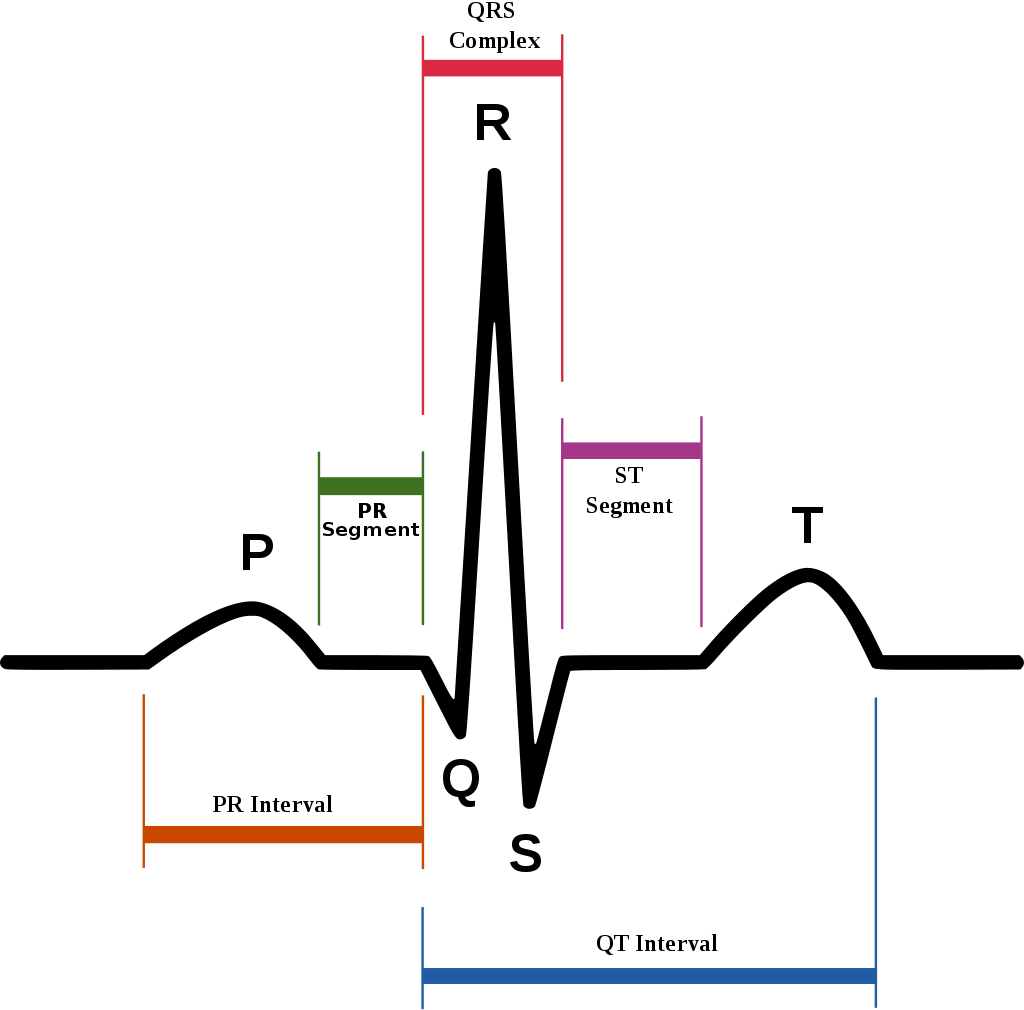

In [4]:
# example of electrocardiographic results with sections labeled. 
from IPython.display import Image
Image(r"C:\Users\Devin\desktop\thinkful\capstone3\1024px-SinusRhythmLabels.svg.png")

By Created by Agateller (Anthony Atkielski), converted to svg by atom. - SinusRhythmLabels.png, Public Domain, https://commons.wikimedia.org/w/index.php?curid=1560893

In [5]:
#examine the date types 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# look for missing values 

raw_df.isna().any()
#no missing values 

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

C:\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

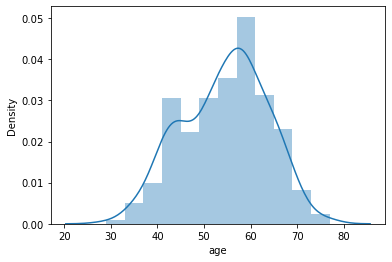

In [7]:
#first look at distribution of age, likely to be a very important feature  

import seaborn as sns

sns.distplot(raw_df['age'])

Nice, the distribution is normal and covers a wide range of ages. Thought I would inspect this one seperately. Now lets move on to the other features. 


C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


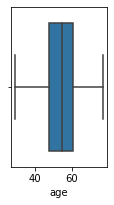

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


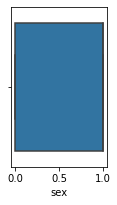

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


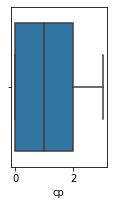

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


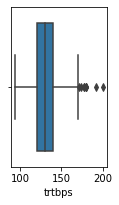

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


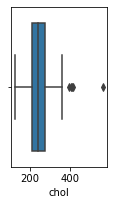

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


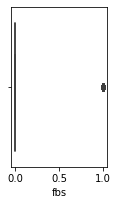

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


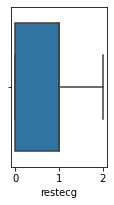

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


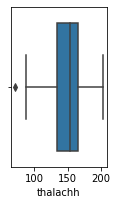

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


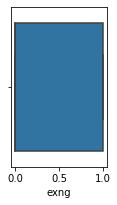

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


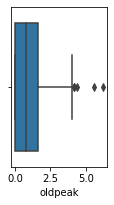

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


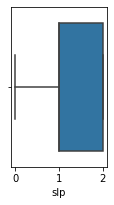

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


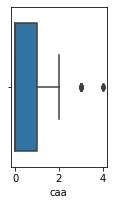

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


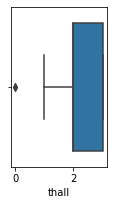

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


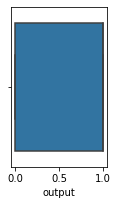

In [8]:
# examine the distribtuion of all of the features. 

import matplotlib.pyplot as plt 

cols = list(raw_df.columns)

for v, i in enumerate(cols):
    plt.figure(figsize=(10,10))
    plt.subplot(3,5,(v+ 1))
    sns.boxplot(raw_df[i])
    plt.show()

Some of these look like they have a bit of an abnormal distribution. Lets plot the ones that look abnormal and take a closer look. 

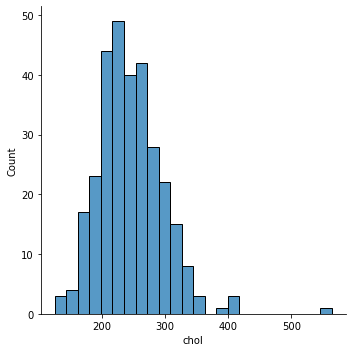

In [9]:
# take another look at chol 
sns.displot(raw_df['chol'])

Looks like a single outlier at around 550 or so. I am going to have to do some winsorization on this feature. 


In [10]:
# winsorize cholesterol 

from scipy.stats.mstats import winsorize

raw_df['chol']= winsorize(raw_df['chol'], limits = [0, 0.025])

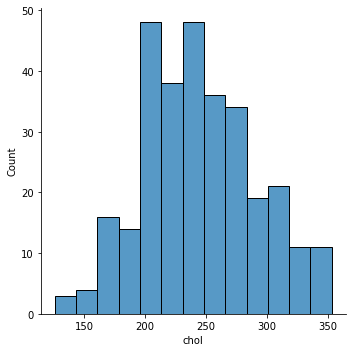

In [11]:
# take another look at chol 
sns.displot(raw_df['chol'])

Looks good, lets move on to fasting blood sugar 

C:\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fbs', ylabel='Density'>

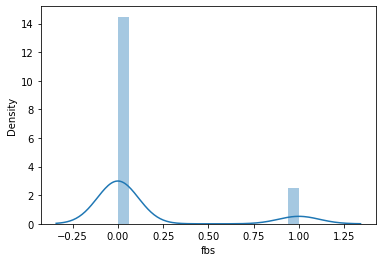

In [12]:
sns.distplot(raw_df['fbs'])


Data looks fine to me as it is just binary. The positive outcome looks to be less common than the negative one. Lets move on to oldpeak. 


C:\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

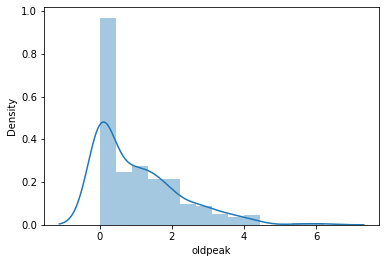

In [13]:
#now look at oldpeak 

sns.distplot(raw_df['oldpeak'])

Data is skewed to the right. 

The value is equal to the distance in mm that the below the baseline of the ST segment (source: https://en.wikipedia.org/wiki/ST_depression#:~:text=ST%20depression%20refers%20to%20a,abnormally%20low%20below%20the%20baseline) We would should therefore expect it to be skewed to the right, as it makes sense that larger anomalies are more rare. 



C:\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='caa', ylabel='Density'>

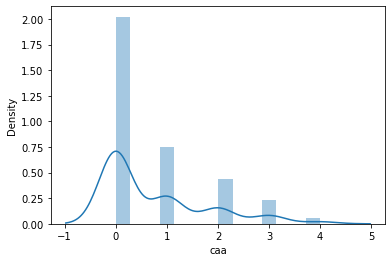

In [14]:
#inspect caa

sns.distplot(raw_df['caa'])

In [15]:
raw_df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


caa = number of major vessels. 

This one is supposed to contain only values 0-3 as per the metadata on kaggle and the uci webvsite. We should replace the 4 values as they are not supposed to exist and are a type of error. At least there is only 5 of them.


In [16]:
#replace the 4 with 3
raw_df['caa'].replace(4, 3, inplace=True)
raw_df['caa'].value_counts()

0    175
1     65
2     38
3     25
Name: caa, dtype: int64

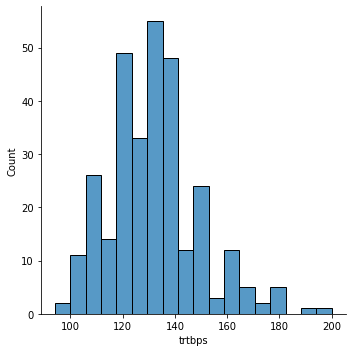

In [17]:
# take another look at resting blood pressure 
sns.displot(raw_df['trtbps'])

That seems fine to me, a few of the patients have a very high blood pressure reading. Around 190 is very dangerous but still possible (source : https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) 

In [18]:
# take another look at the data at this point, make sure it is all good before scaling and fitting models.  

raw_df.info()

#ok, they are all integer or float type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Everything looks good to me. 

Time to scale the features and seperate the features from the target 

In [19]:
#seperate features and the target 
X = raw_df.drop('output', axis=1)

y = raw_df['output']

In [20]:
#scale the features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std)

In [21]:
#inspect the scaled feature set 
X_std.head()

#looks good, time to try some visualization techniques and see how well they work 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.253198,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.731175,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.110602,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.731175,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.873796,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.731175,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.188998,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.731175,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.314797,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.731175,-0.512922


In [22]:
# first try the umap visualization 

import umap 

%time umap_results = umap.UMAP(n_neighbors=40, min_dist = 0.3, metric ='correlation').fit_transform(X_std)

Wall time: 7.54 s


Text(0.5, 1.0, 'UMAP projection of Heart Attack Data')

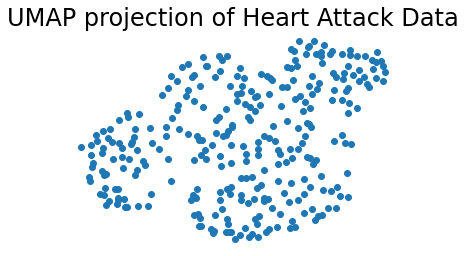

In [23]:
import matplotlib.pyplot as plt 
plt.scatter(
    umap_results[:, 0],
    umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of Heart Attack Data', fontsize=24)

That looks alright, but we should try some different values for the hyperparameters and see if we can get a visualization with some more obvious clusters. 

In [24]:
# adapted this function from the umap documentation 

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_std);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

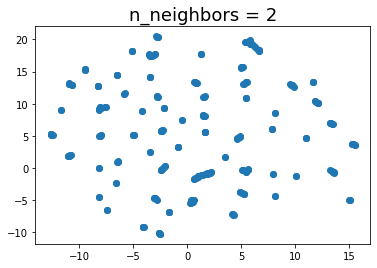

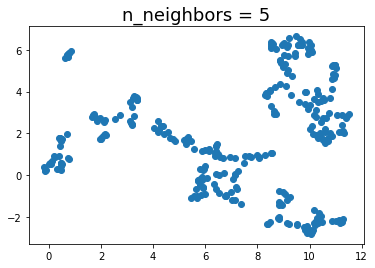

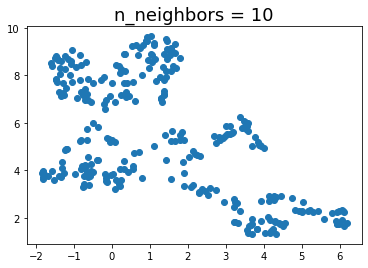

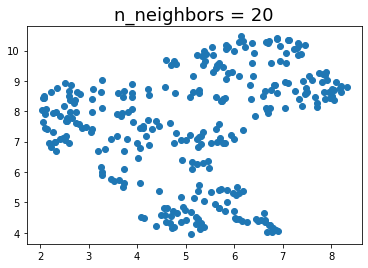

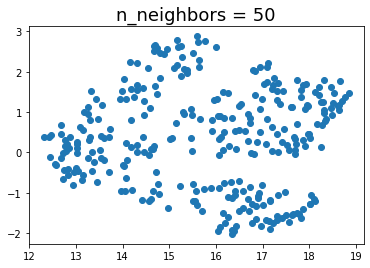

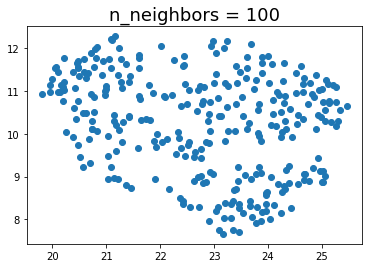

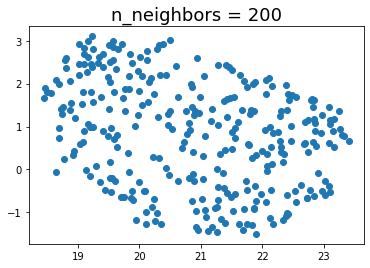

In [25]:
# test out some different values for the number of neighbors. 
# this controls the focus of the algorithm on local or bigger picure structures 

for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

5 - 10 n_neighbors looks like a good call for this particular dataset. There is some obvious clusters that are well seperated. 

Now lets tune the min dist parameter 

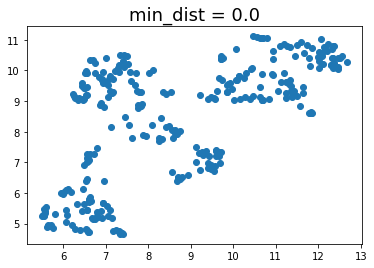

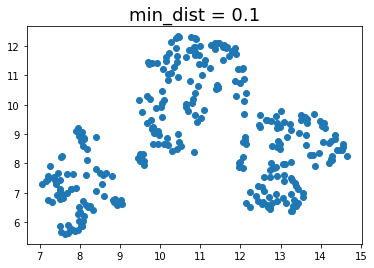

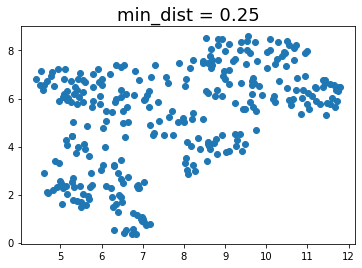

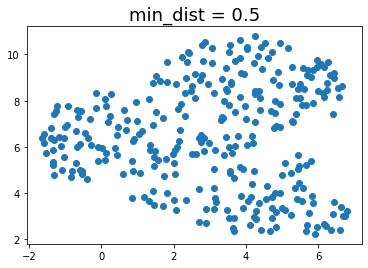

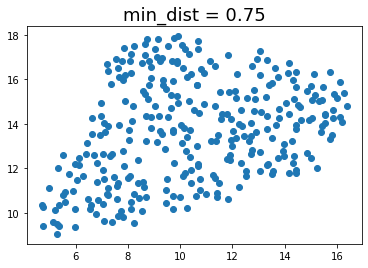

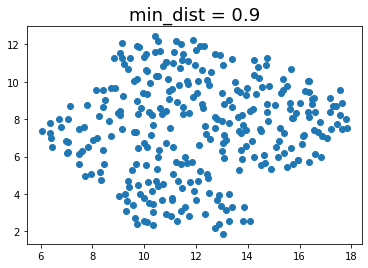

In [26]:
for d in (0.0, 0.1, 0.25, 0.5, 0.75, 0.90):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Looks like the lower end of values plotted produces more of the small groups in the data. Lets utilize a lower distance value of around 0.1, as we are interested in preserving these small clusters. 

n_dimensions is should be set to 2, as we arent interested in 1d representations. I have included a 3d reprsentation of the data below with 

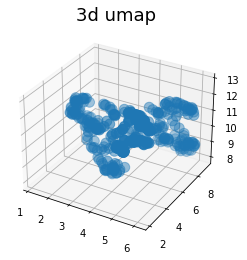

In [27]:
draw_umap(n_components=3, min_dist = 0.1, n_neighbors = 10, title='3d umap')


Matplotlib does not do a good job at plotting in 3d.. hard to visualize comppared to 2d representations. 

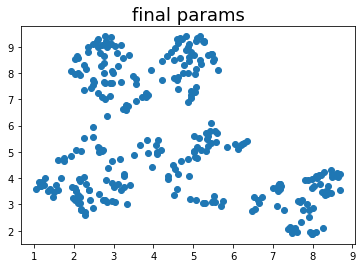

In [28]:
#final visualization 
draw_umap(min_dist = 0.1, n_neighbors = 10, title='final params')

#save the projection to object for use later 
umap_results = umap.UMAP(n_neighbors=10, min_dist = 0.1, metric ='correlation').fit_transform(X_std)

In [75]:
# lets try the t-sne algorithm 

from sklearn.manifold import TSNE 

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter =300)

tsne_result = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.000s...
[t-SNE] Computed neighbors for 303 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 1.698537
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.328979
[t-SNE] KL divergence after 300 iterations: 1.002097


Text(0.5, 1.0, 'T-SNE projection of heart attack dataset')

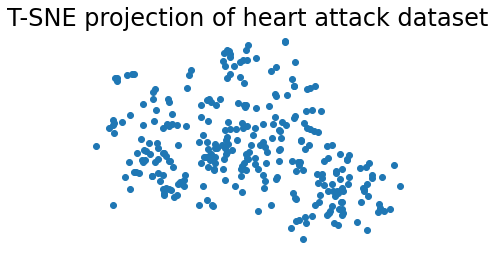

In [76]:
import matplotlib.pyplot as plt 
plt.scatter(
    tsne_result[:, 0],
    tsne_result[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('T-SNE projection of heart attack dataset', fontsize=24)

That does not look very good, just a single large cluster. Lets try PCA, but I expect that UMAP will ultimately give the best result due to the complexity of this dataset. 

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X_std)

Text(0.5, 1.0, 'PCA projection of heart attack dataset')

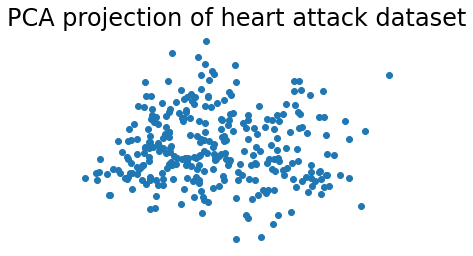

In [78]:
import matplotlib.pyplot as plt 
plt.scatter(
    pca[:, 0],
    pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('PCA projection of heart attack dataset', fontsize=24)

As expected, this projection does not show many obvious clusters. Lets stick with UMAP. I think the UMAP projection it is about as good as it will get for this particular dataset. The parameters have been tuned, and this algorithm performed better initially than t-sne or pca as we would expect. Lets move on to fitting some models starting with k-means. 

<AxesSubplot:>

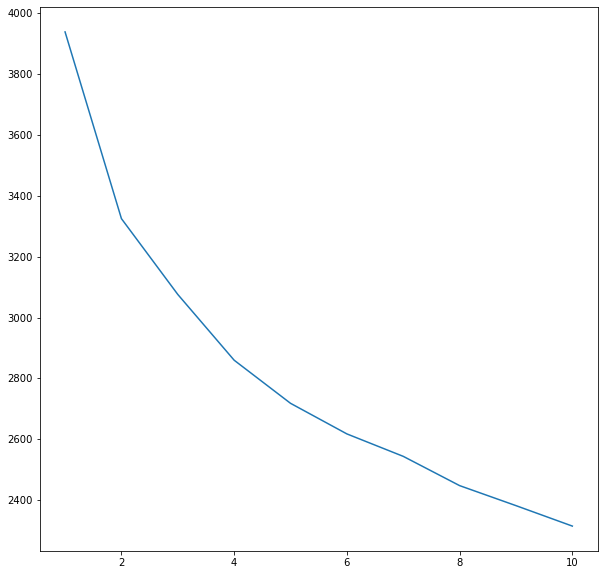

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics 

#start with an inertia plot straight away, lets find the best number of groups 

clusters = []

for v in range(1, 11):
    km = KMeans(n_clusters=v).fit(X_std)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)



Pretty gradual plot with no real distinctive elbow. Lets try k=5 and k=7 to start and go from there. 


C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of customer dataset k_means')

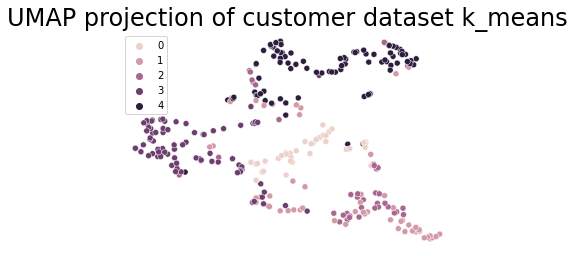

In [68]:
import seaborn as sns

#fit model k = 5 
k_means = KMeans(n_clusters = 5)
k_means.fit(X_std)

#now plot it 
sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], k_means.labels_)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of customer dataset k_means', fontsize=24)

In [32]:
# get the silhoutte score of the model 

print(metrics.silhouette_score(X_std,k_means.labels_))

0.11563878826192656


This looks pretty good considering the dataset and the shape of the projection. There is some overlap between groups, but it certianly could be worse. The bottom right of the plot seems like the worst section, with 1 group that is entirely contained within another. Lets try 7 clusters and see if that improves the situation. 

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of customer dataset k_means')

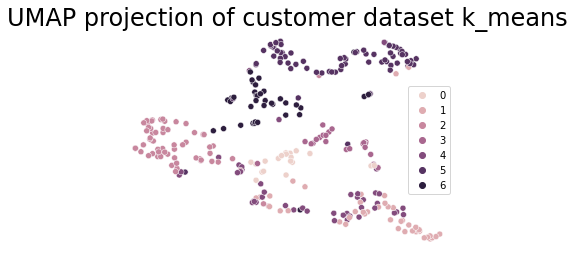

In [33]:
#fit model k = 7 
k_means = KMeans(n_clusters = 7)
k_means.fit(X_std)

sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], k_means.labels_)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of customer dataset k_means', fontsize=24)

In [34]:
print(metrics.silhouette_score(X_std,k_means.labels_))

0.11846128786285924


This produced a very similar result to the previous model. No real improvement here. There is significant overlap in the bottom section of the visualization, and no large increase in silhoutte score. I think the previous model is better. 

Lets try 2 clusters and see if it can seperate the 2 outcomes. 

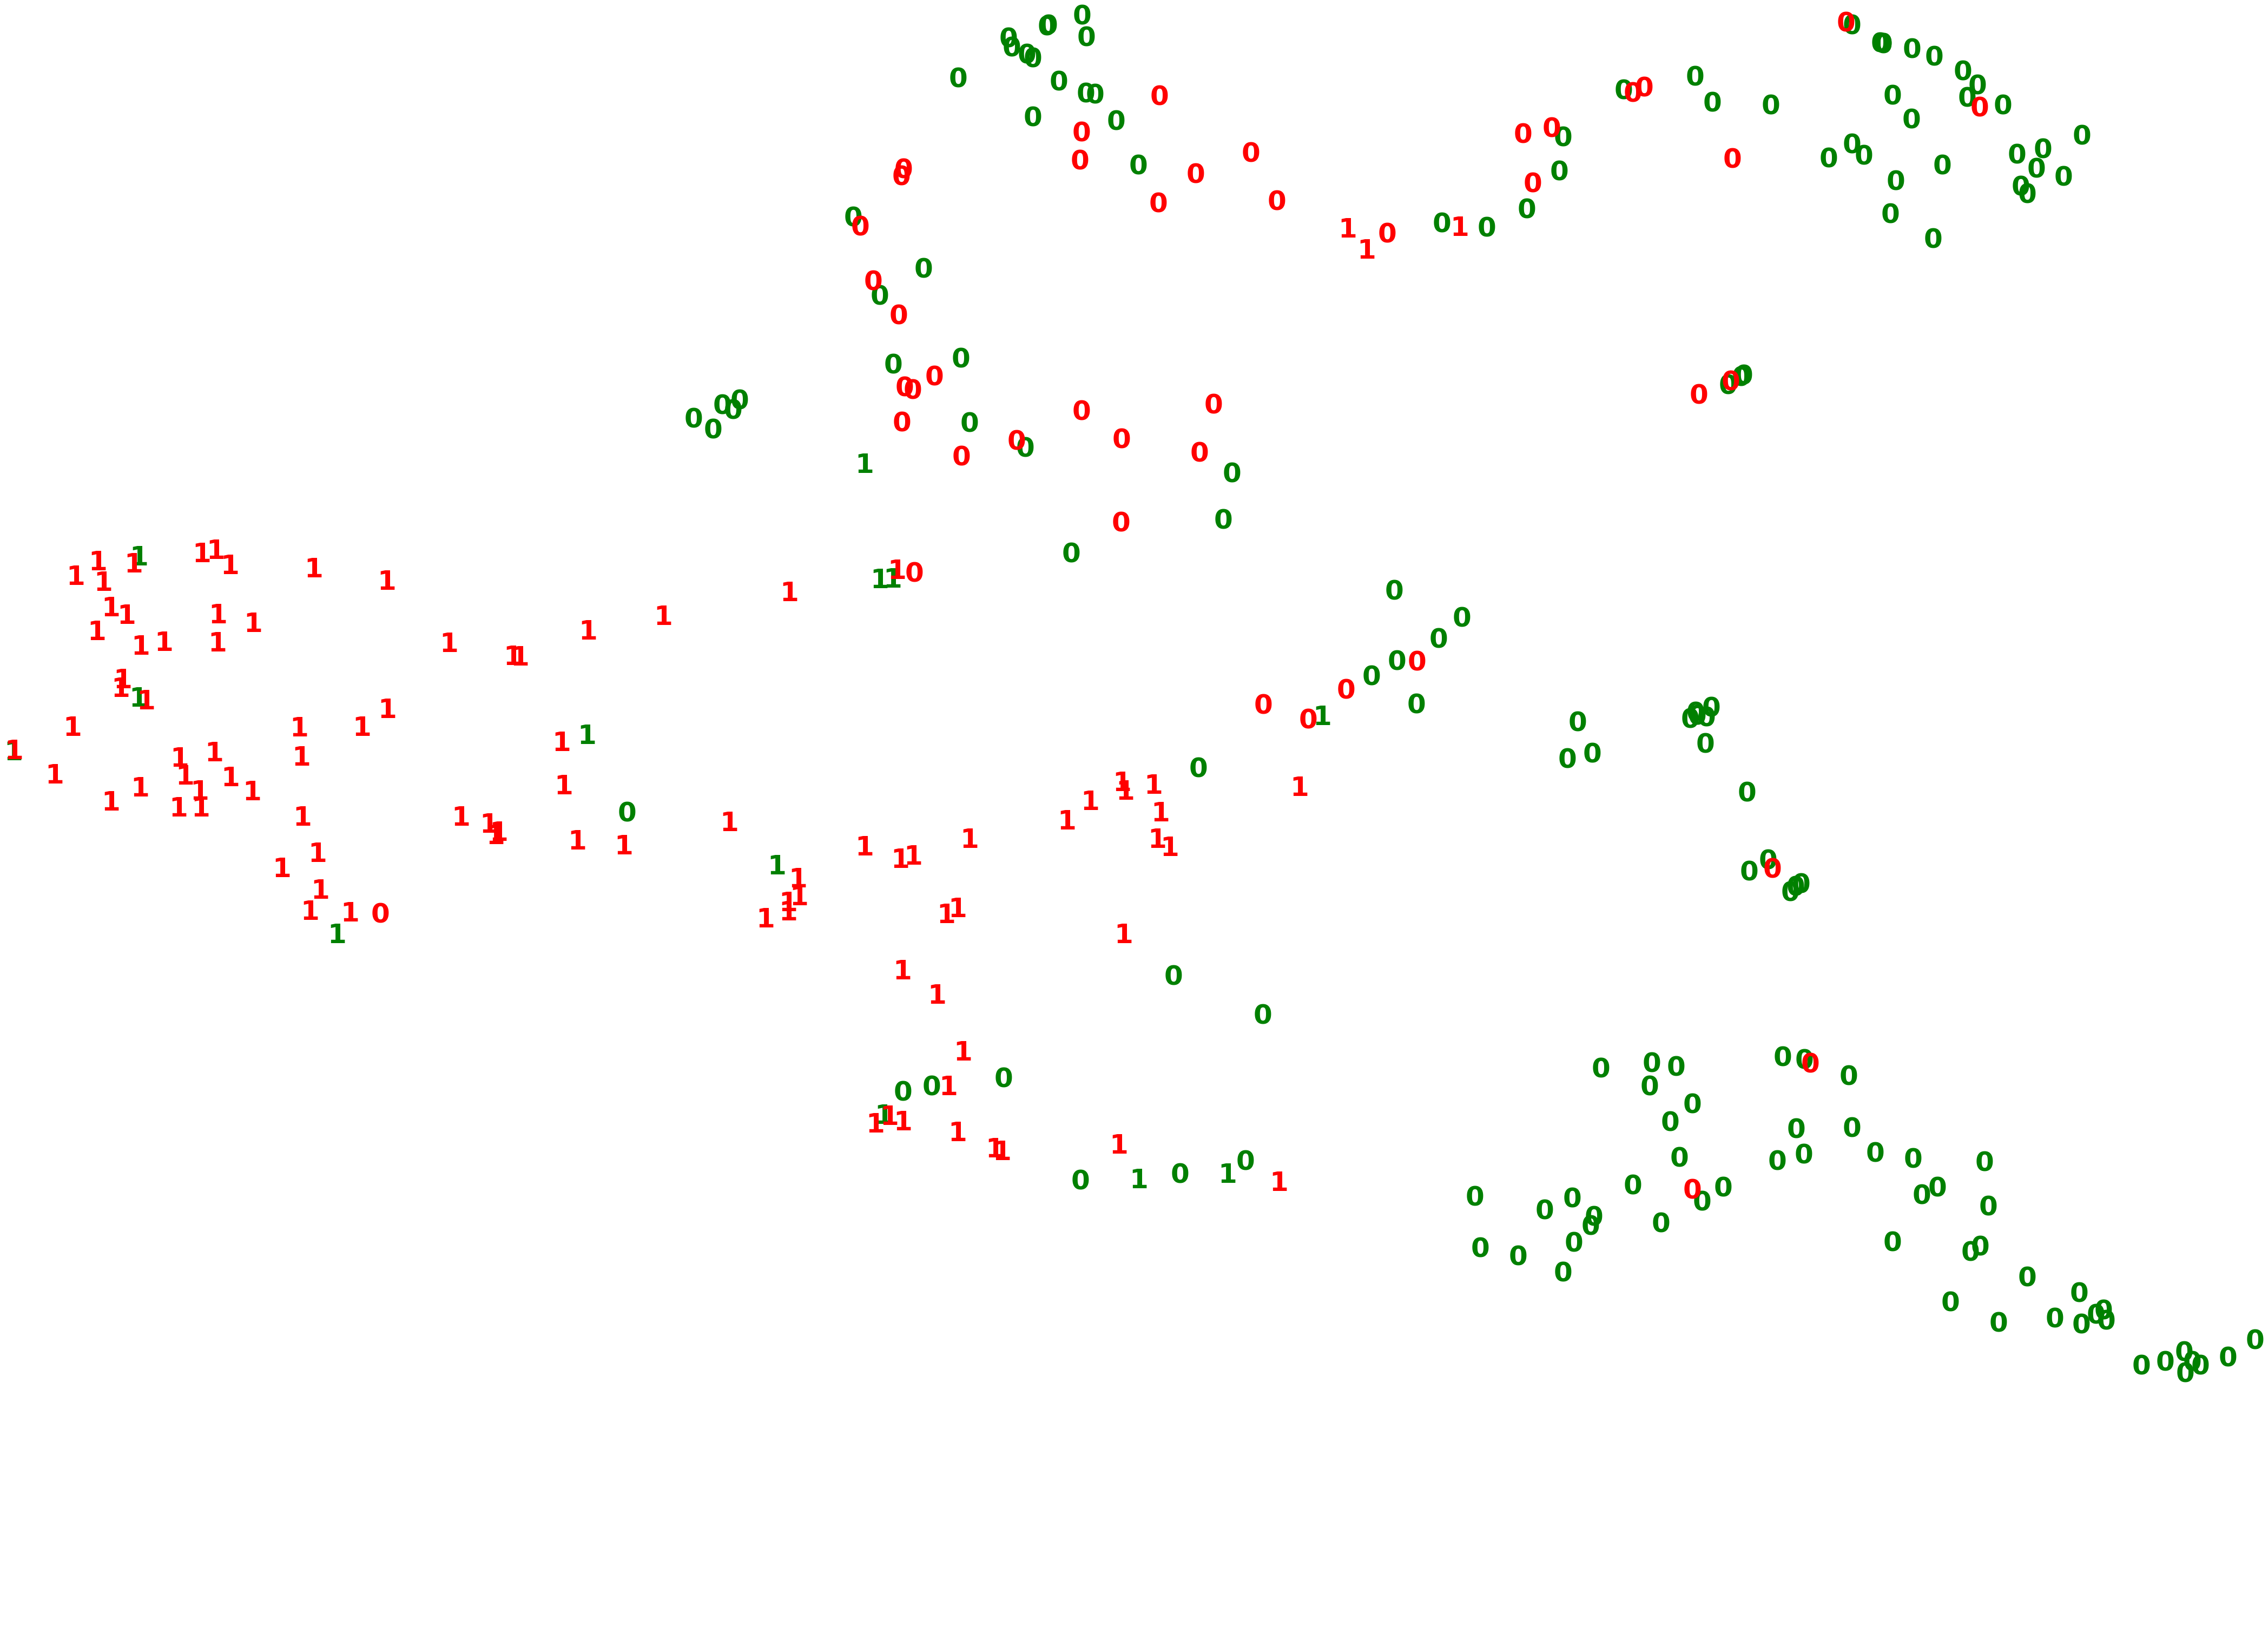

In [70]:
#plot the 2 clusters versus their actual outcomes, high heart attack risk versus low risk 
k_means = KMeans(n_clusters = 2)
k_means.fit(X_std)

plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(k_means.labels_[i]), #cluster labels 
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [71]:
print(metrics.silhouette_score(X_std,k_means.labels_))

0.16770788750197124


Seems like the UMAP visualization has done an ok good job at seperating the high risk and lower risk groups. But K-means has done a  poor job at seperating the two groups, evident by the 2 groups overlaping considerably and the poor silhoutte score. Lets move on to some other models and see if they can perform better at either grouping distinct groups or seperating the two outcomes. 

Try the DBSCAN Model

In [73]:
from sklearn.cluster import DBSCAN

# Defining the model
dbscan_cluster = DBSCAN(eps=3, min_samples=10)

# Fit model
clusters = dbscan_cluster.fit(X_std)



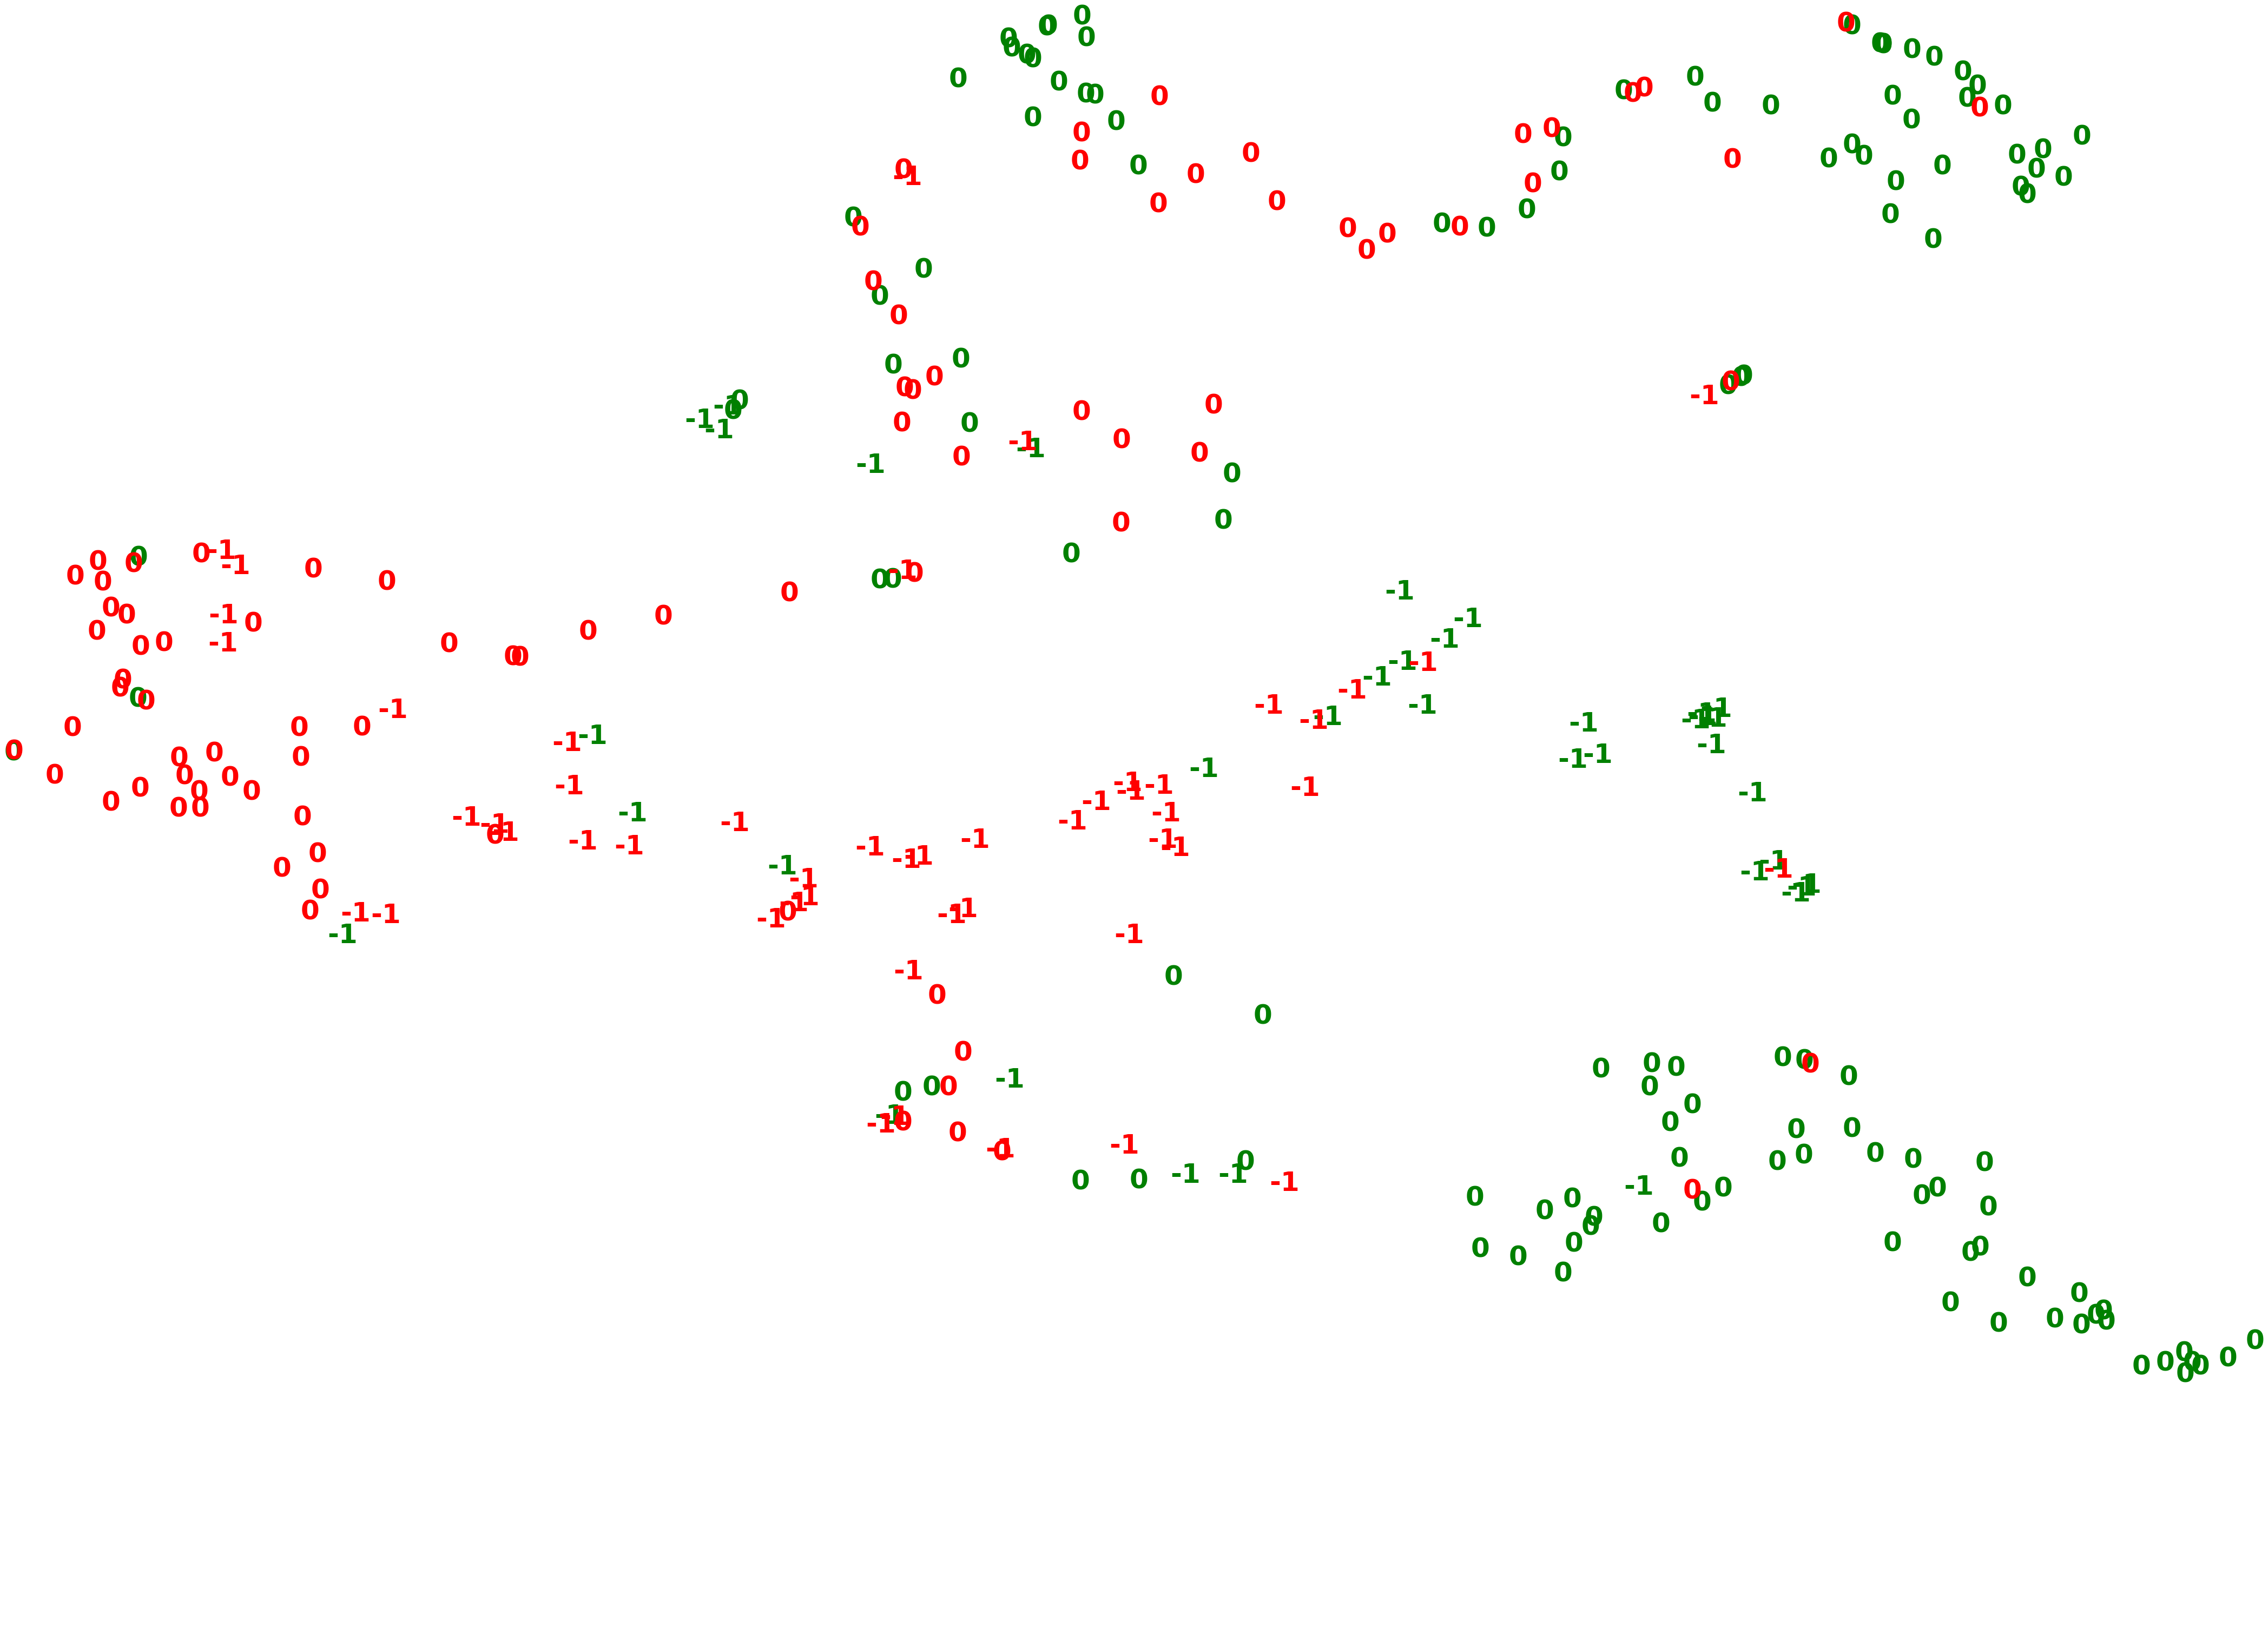

In [74]:
#now plot it with color coded outcomes 
plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters.labels_[i]), #cluster labels 
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Looks like dbscan just found one large group and then marked some of the other points as noise. Not a good initial result. Lets see if some different hyperparameters can change that and increase the accuracy of the model. 

In [40]:
# get silhoutte score for different min_sample values 

min_samp = list(range(5,20))


for i in min_samp:
    print('min sample value is :' + str(i))
    db = DBSCAN(eps = 3, min_samples = i).fit(X_std)
    print(metrics.silhouette_score(X_std, db.labels_))
    

min sample value is :5
0.03600260209705149
min sample value is :6
0.05512414827096475
min sample value is :7
0.14243681274102793
min sample value is :8
0.13925806770746688
min sample value is :9
0.13762051796173927
min sample value is :10
0.129374528354395
min sample value is :11
0.1267309266659819
min sample value is :12
0.1267309266659819
min sample value is :13
0.12458988455500129
min sample value is :14
0.12233231357477496
min sample value is :15
0.12233231357477496
min sample value is :16
0.11868995610672287
min sample value is :17
0.11425645169913404
min sample value is :18
0.11175384865154216
min sample value is :19
0.10601123560127833


optimial min sample value seems to be around 7. Now lets tune the epsilon value 

In [41]:
#get silhoutte scores for different epsilon values 
eps_values = np.arange(0.25, 10, 0.5)


for i in eps_values:
    try:
        print('min sample value is :' + str(i))
        db = DBSCAN(eps = i, min_samples = 7).fit(X_std)
        print(metrics.silhouette_score(X_std, db.labels_))
    except:
        print('value error number of labels')
        pass

min sample value is :0.25
value error number of labels
min sample value is :0.75
value error number of labels
min sample value is :1.25
value error number of labels
min sample value is :1.75
-0.14379092014421235
min sample value is :2.25
-0.010287032186486352
min sample value is :2.75
0.11013264744476138
min sample value is :3.25
0.17100693483926938
min sample value is :3.75
0.25323157223085585
min sample value is :4.25
0.3050747421404568
min sample value is :4.75
value error number of labels
min sample value is :5.25
value error number of labels
min sample value is :5.75
value error number of labels
min sample value is :6.25
value error number of labels
min sample value is :6.75
value error number of labels
min sample value is :7.25
value error number of labels
min sample value is :7.75
value error number of labels
min sample value is :8.25
value error number of labels
min sample value is :8.75
value error number of labels
min sample value is :9.25
value error number of labels
min sam

optimal value is between 3 and 5 

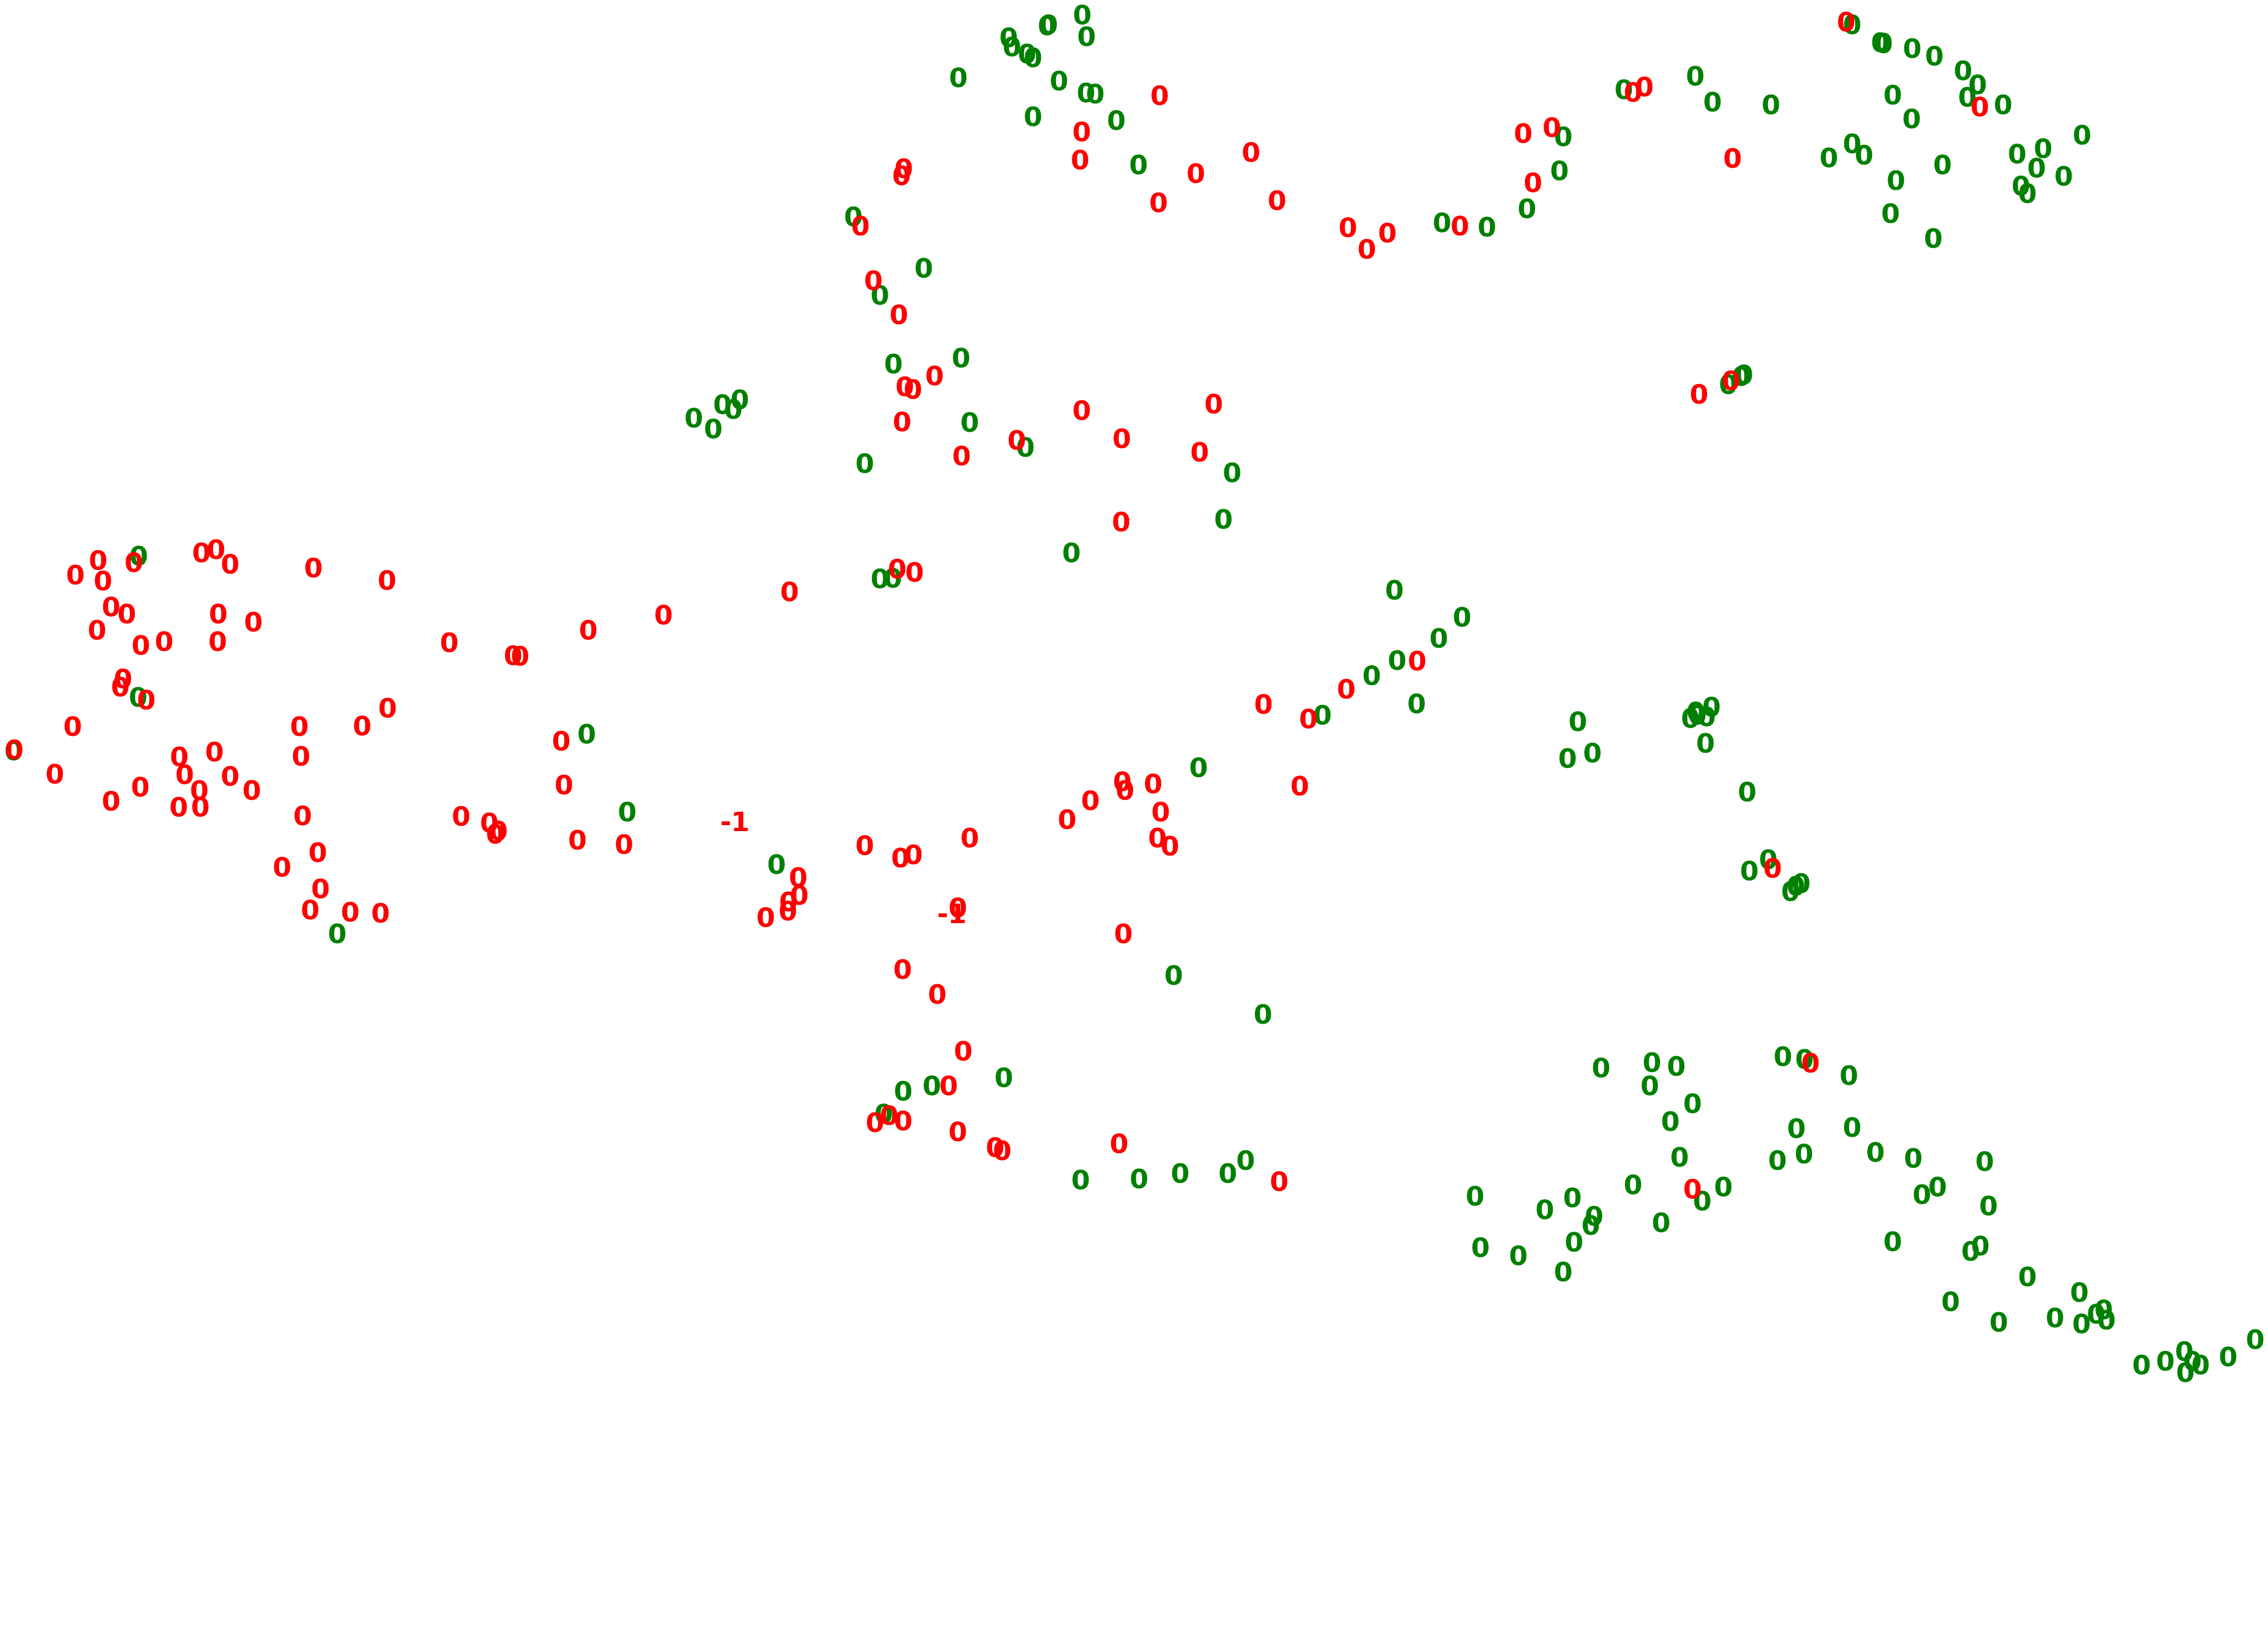

In [43]:
# eps = 4.2 and n_samples = 7, best combination that was found. Lets plot it and see how it looks 

# Defining the model
dbscan_cluster = DBSCAN(eps= 4.2, min_samples=7)

# Fit model
clusters = dbscan_cluster.fit(X_std)

plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters.labels_[i]), #cluster labels 
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Does a poor job, just predicts everything to one class with one point predicted as noise.Very similar to the previous run of the model. Lets try the gaussian mixture model and see if it is a better performer. 

In [44]:
# try gaussian mixtures, start with 4 groups

from sklearn.mixture import GaussianMixture

gmm_clusters = GaussianMixture(n_components=4)

#fit the model 

g_clusters = gmm_clusters.fit_predict(X_std)



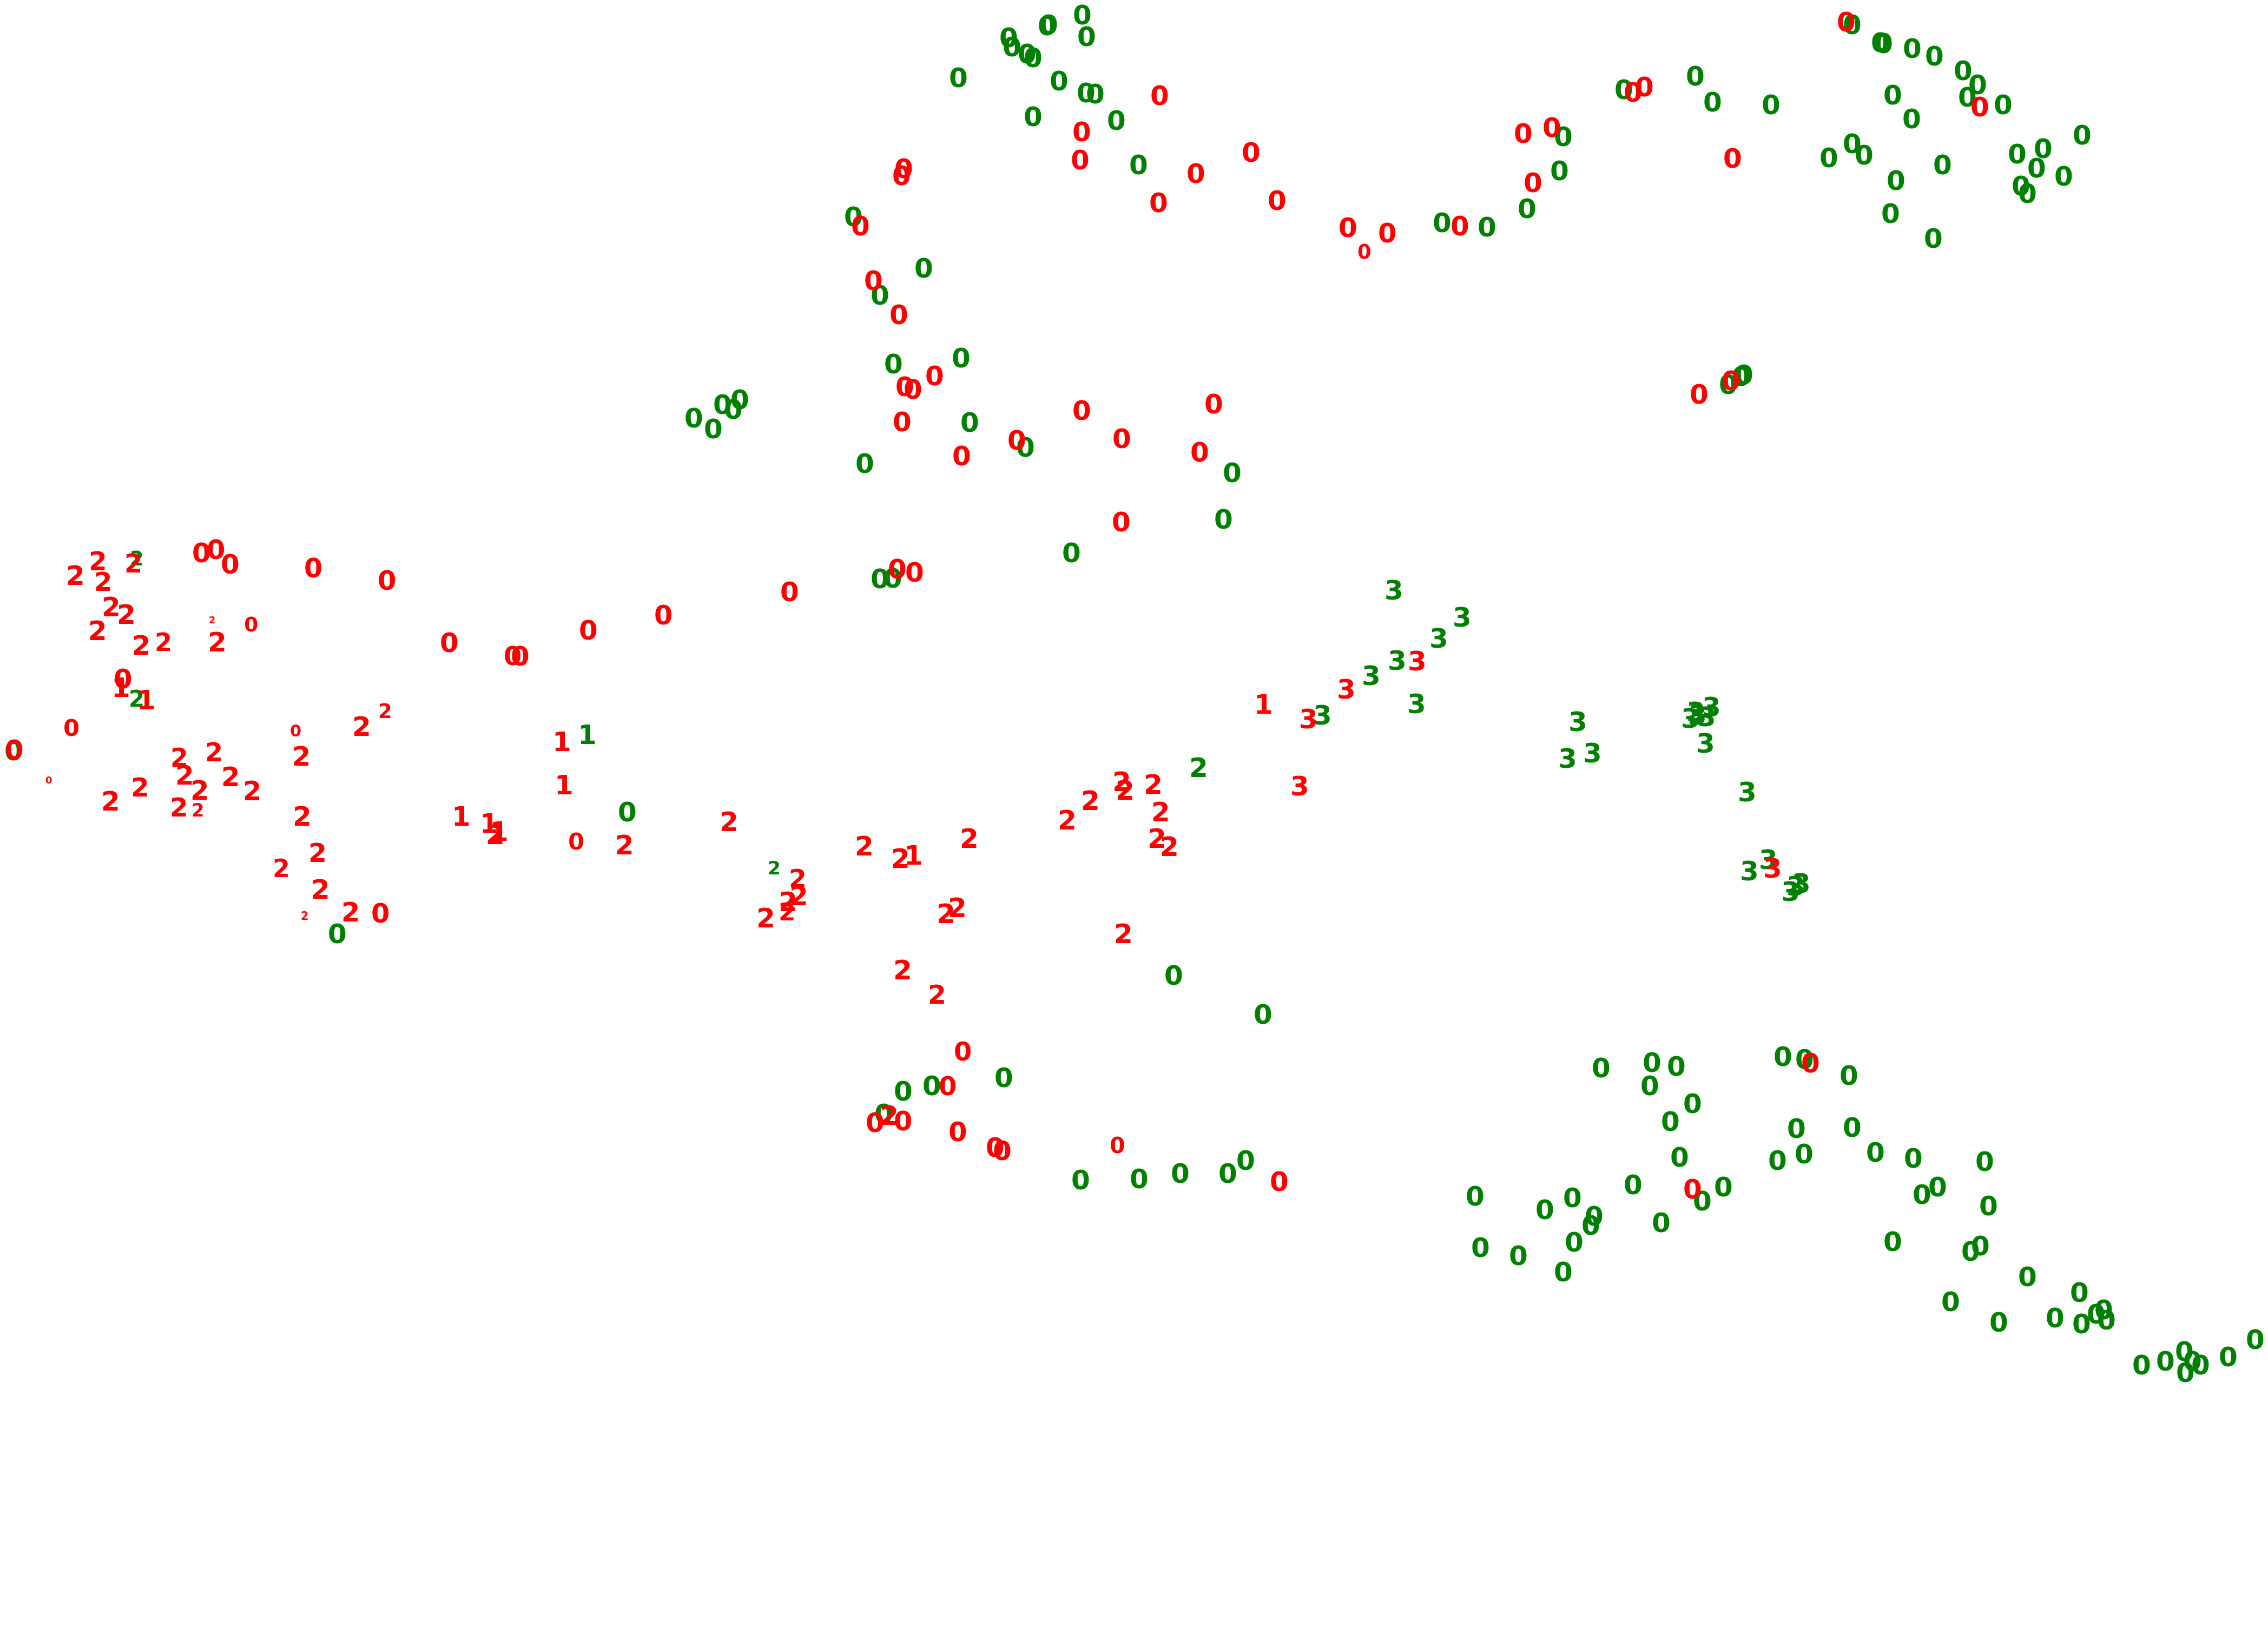

In [45]:
#plot this model with true classes in color, and size signifiying model certainty about a single point 
probs = gmm_clusters.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  

plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(g_clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# get the silhoutte score of the model 
print(metrics.silhouette_score(X_std, g_clusters, metric = 'euclidean'))

#very poor performance, try tuning this one ?

It looks better than the DBSCAN model, but there is still significant overlap of groups, and the true outcome is still scattered between groups. Lets do some more parameter tuning and see if that increases its' accuracy. 

In [47]:
#try some different cluster number values and compare the silhoutte score values 

cluster_number = np.arange(2, 10, 1)


for i in cluster_number:
    print('min sample value is :' + str(i))
    gmm_clusters = GaussianMixture(n_components = i).fit_predict(X_std)
    print(metrics.silhouette_score(X_std, gmm_clusters))
 

min sample value is :2
0.10565958907954023
min sample value is :3
0.0758881298333818
min sample value is :4
0.09191177782779655
min sample value is :5
0.08246677935099649
min sample value is :6
0.09478056507239184
min sample value is :7
0.0816658691319598
min sample value is :8
0.07316035617628688
min sample value is :9
0.05374895781344238


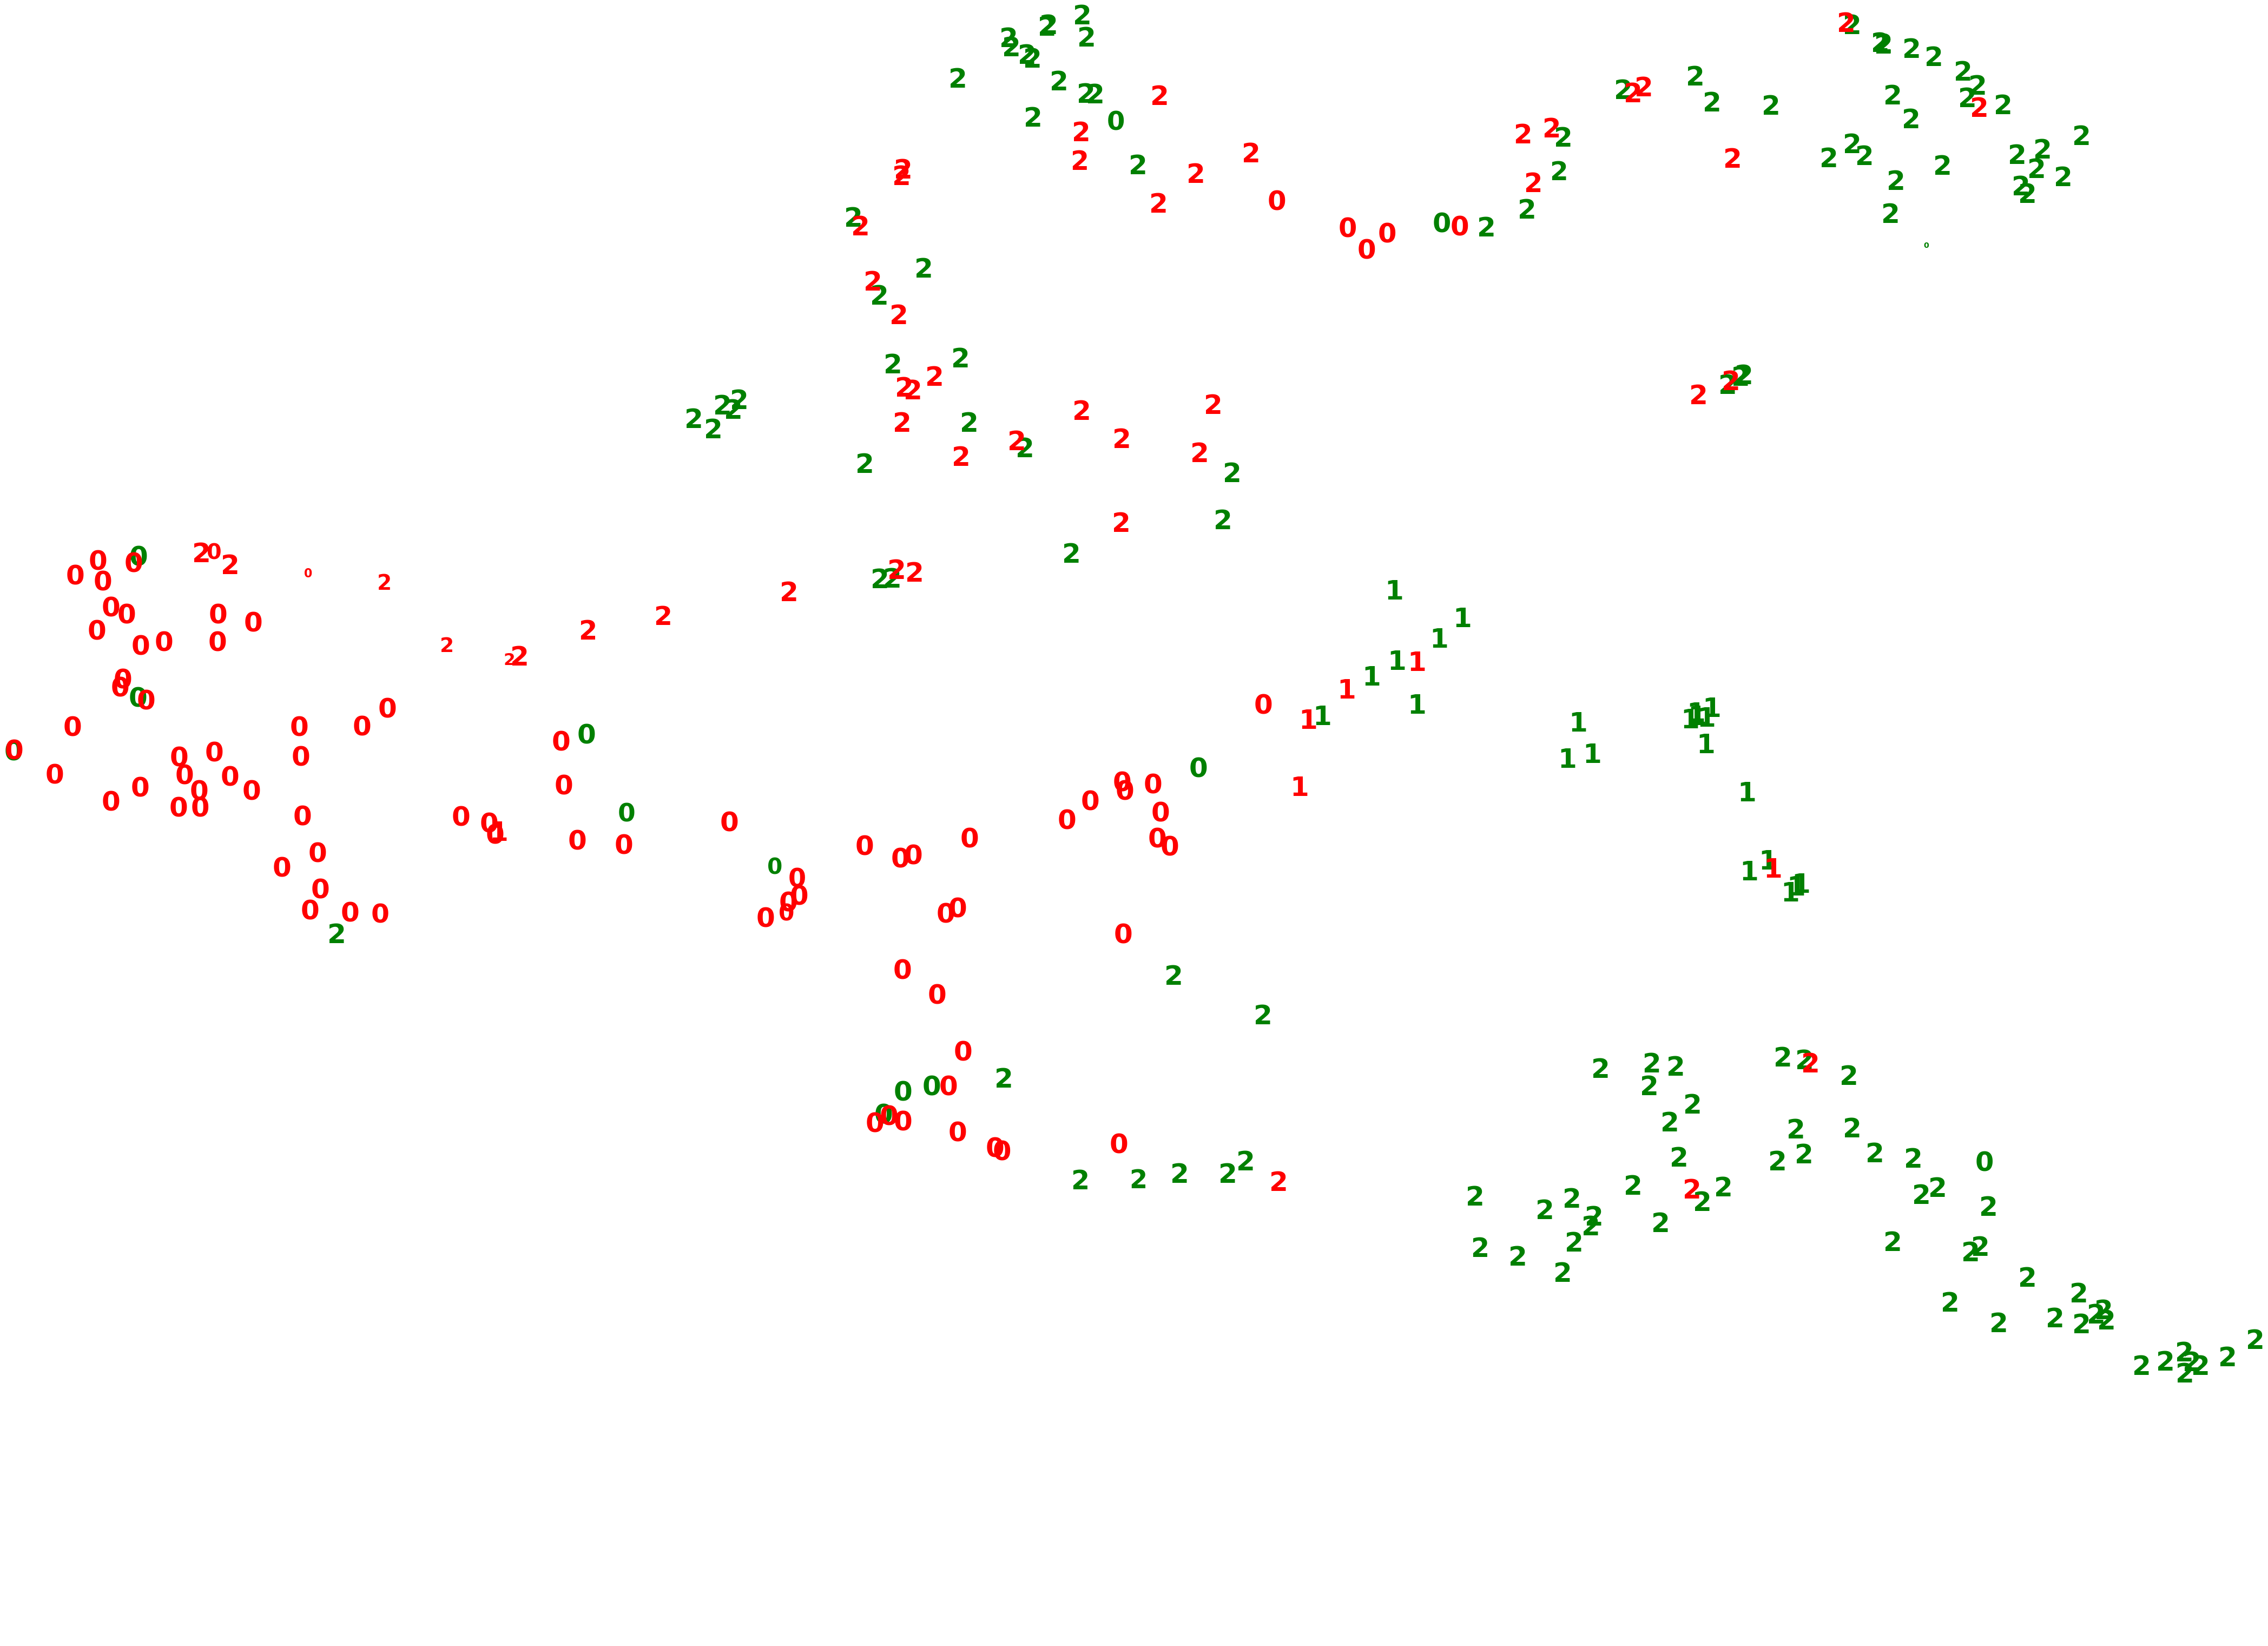

In [50]:
# best model has a group number of 3 
#try fitting the best model to the data 

gmm_clusters = GaussianMixture(n_components=3)

g_clusters = gmm_clusters.fit_predict(X_std)

probs = gmm_clusters.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  

plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(g_clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

silhoutte score = 0.13752639254555918, from the optimization step from above  

Seems like the same exact case as above with the 4 group model. The groups are more or less intertwined, and there is no defined seperation between the high risk and lower risk outcomes. Lets try one last model type and see how it turns out. 

Try hierarchical clustering technique after this... 

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering 

agg_cluster = AgglomerativeClustering(linkage= 'complete', affinity = 'cosine', n_clusters = 5)

#now fit it 
clusters = agg_cluster.fit_predict(X_std)

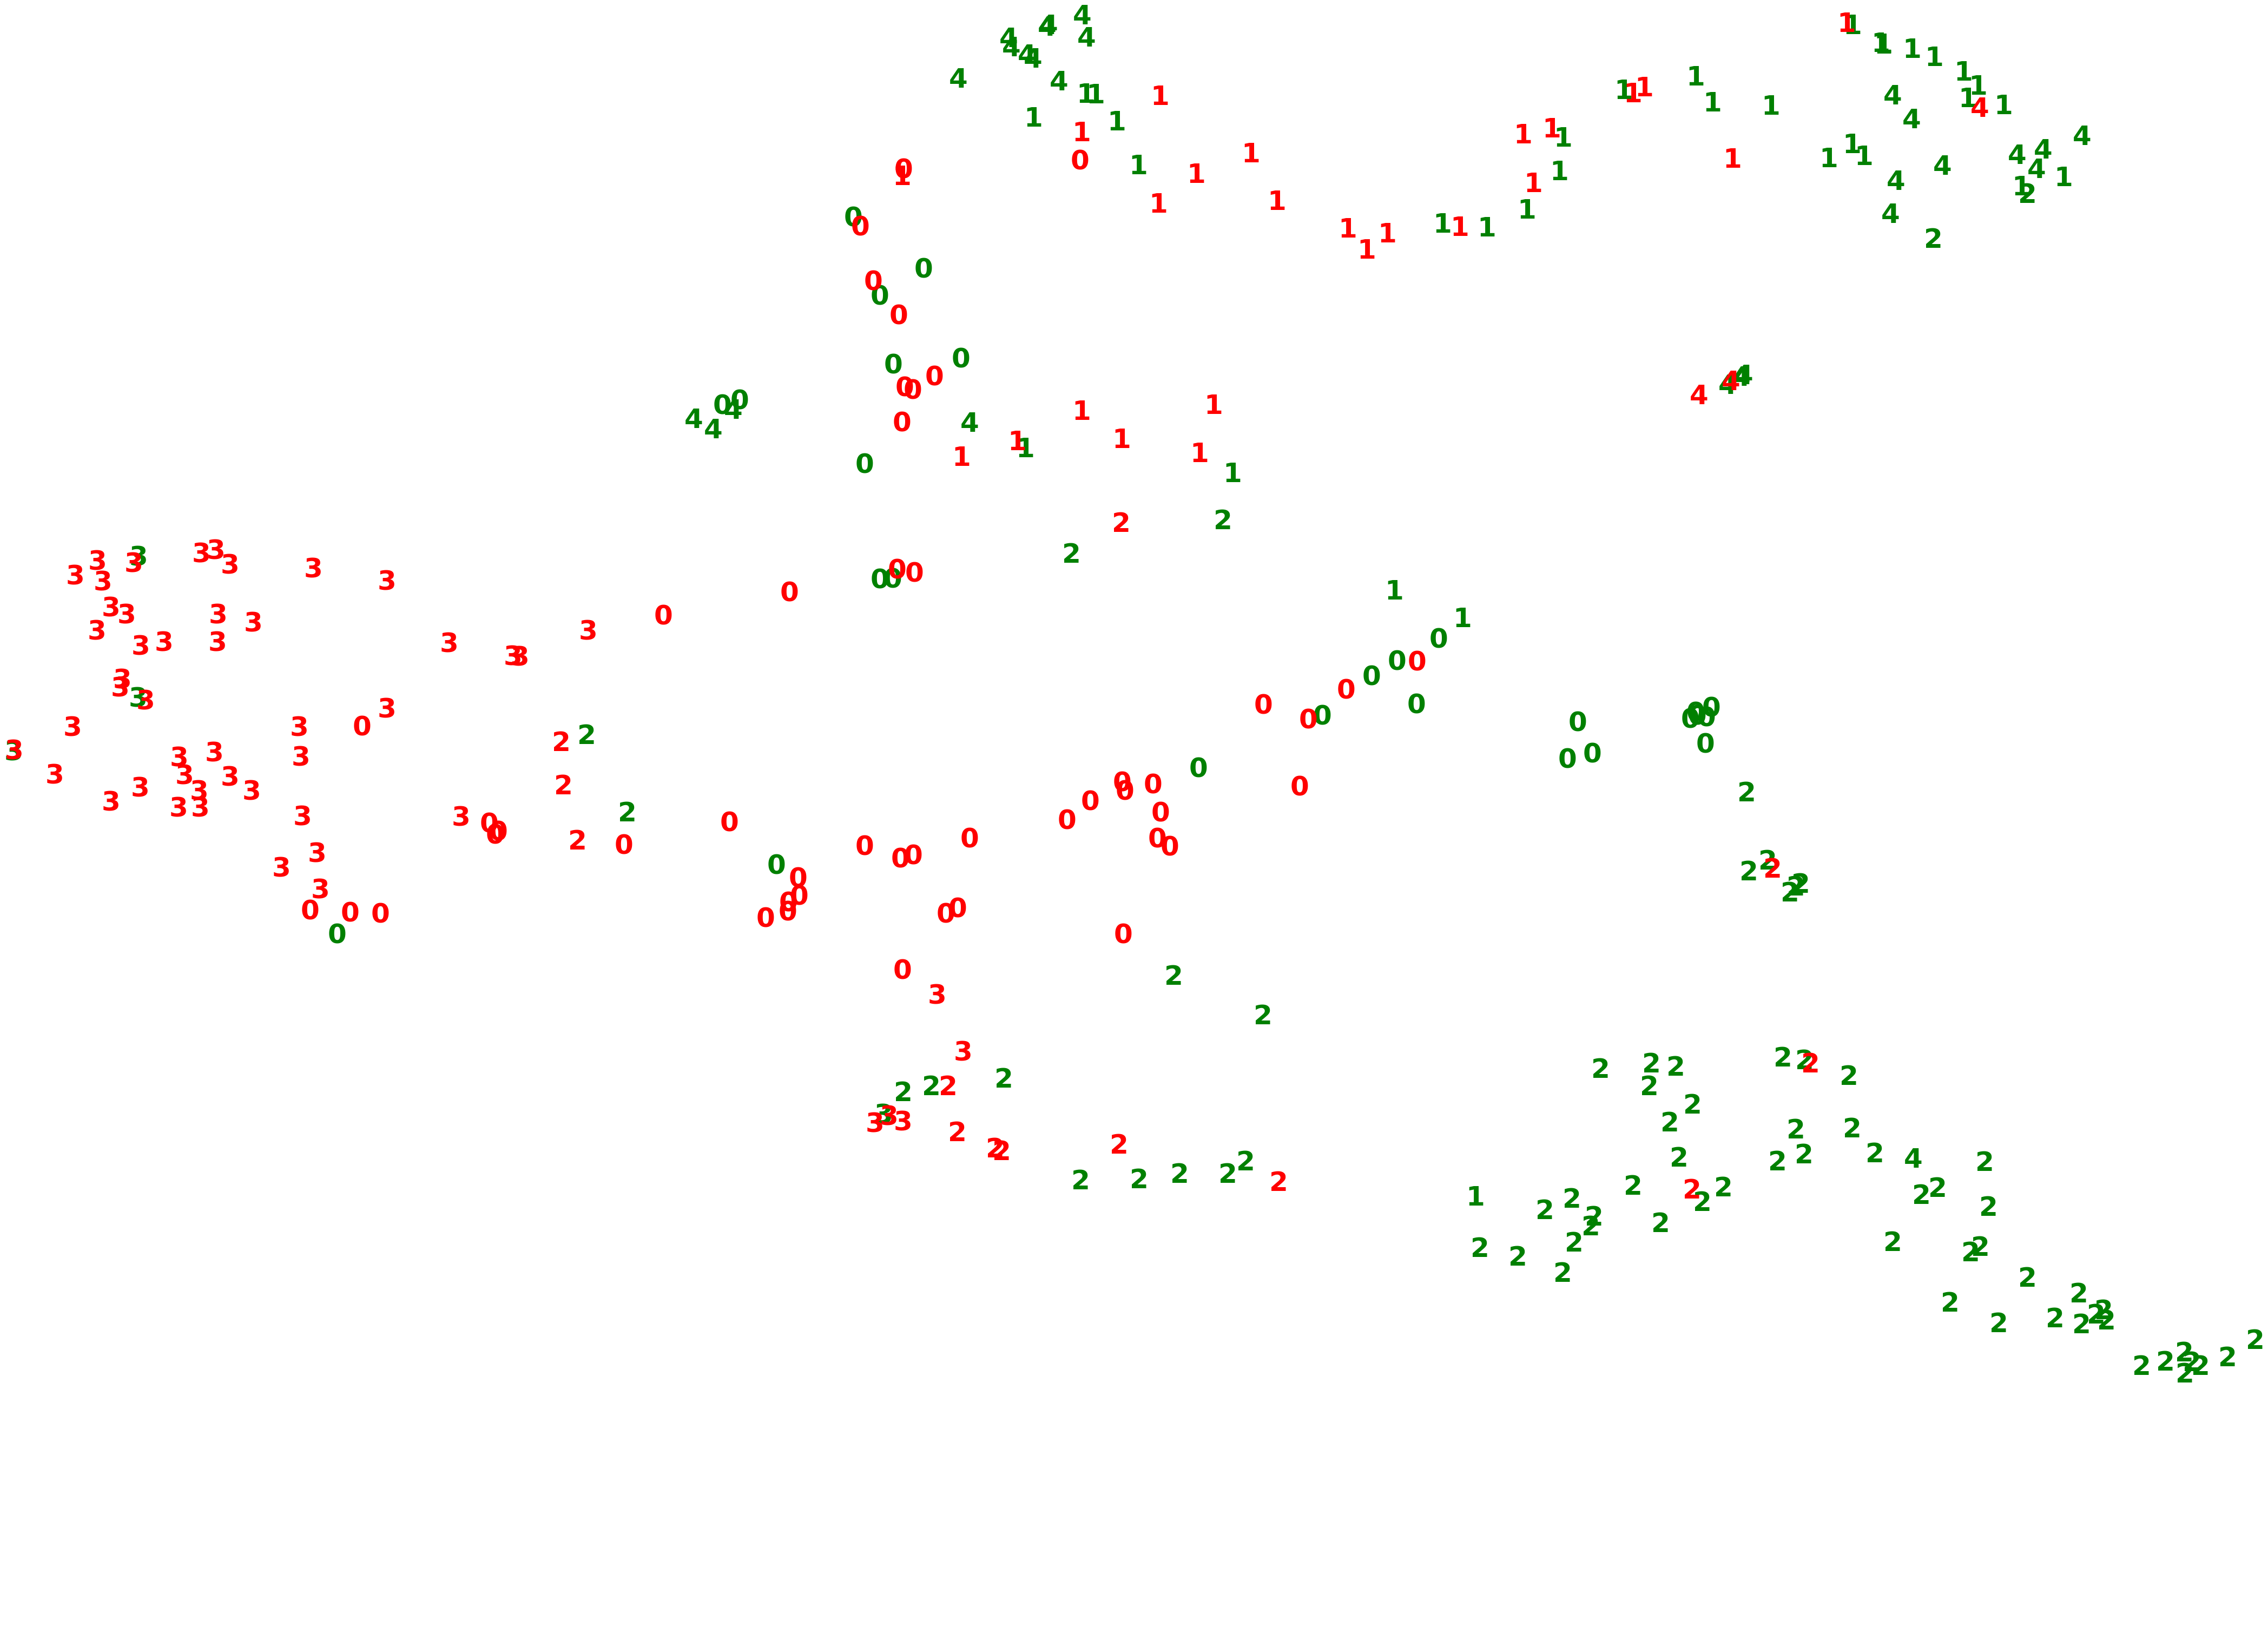

In [57]:
plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]), #cluster labels 
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [58]:
# get the silhoutte score 
print(metrics.silhouette_score(X_std, clusters, metric = 'euclidean'))

#lowest silhoutte score we have seen so far. Lets try tuning it and see what happens 

0.05003628805446774


In [66]:
cluster_number = np.arange(2, 10, 1)

for i in cluster_number:
    print('min sample value is :' + str(i))
    agg_cluster = AgglomerativeClustering(linkage='complete', affinity ='cosine', n_clusters = i).fit_predict(X_std)
    print(metrics.silhouette_score(X_std, agg_cluster))

min sample value is :2
0.12927680253460425
min sample value is :3
0.08061270213676937
min sample value is :4
0.08656648327549063
min sample value is :5
0.05003628805446774
min sample value is :6
0.0617578245319465
min sample value is :7
0.06139922008426193
min sample value is :8
0.06285880886948987
min sample value is :9
0.04742668591461042


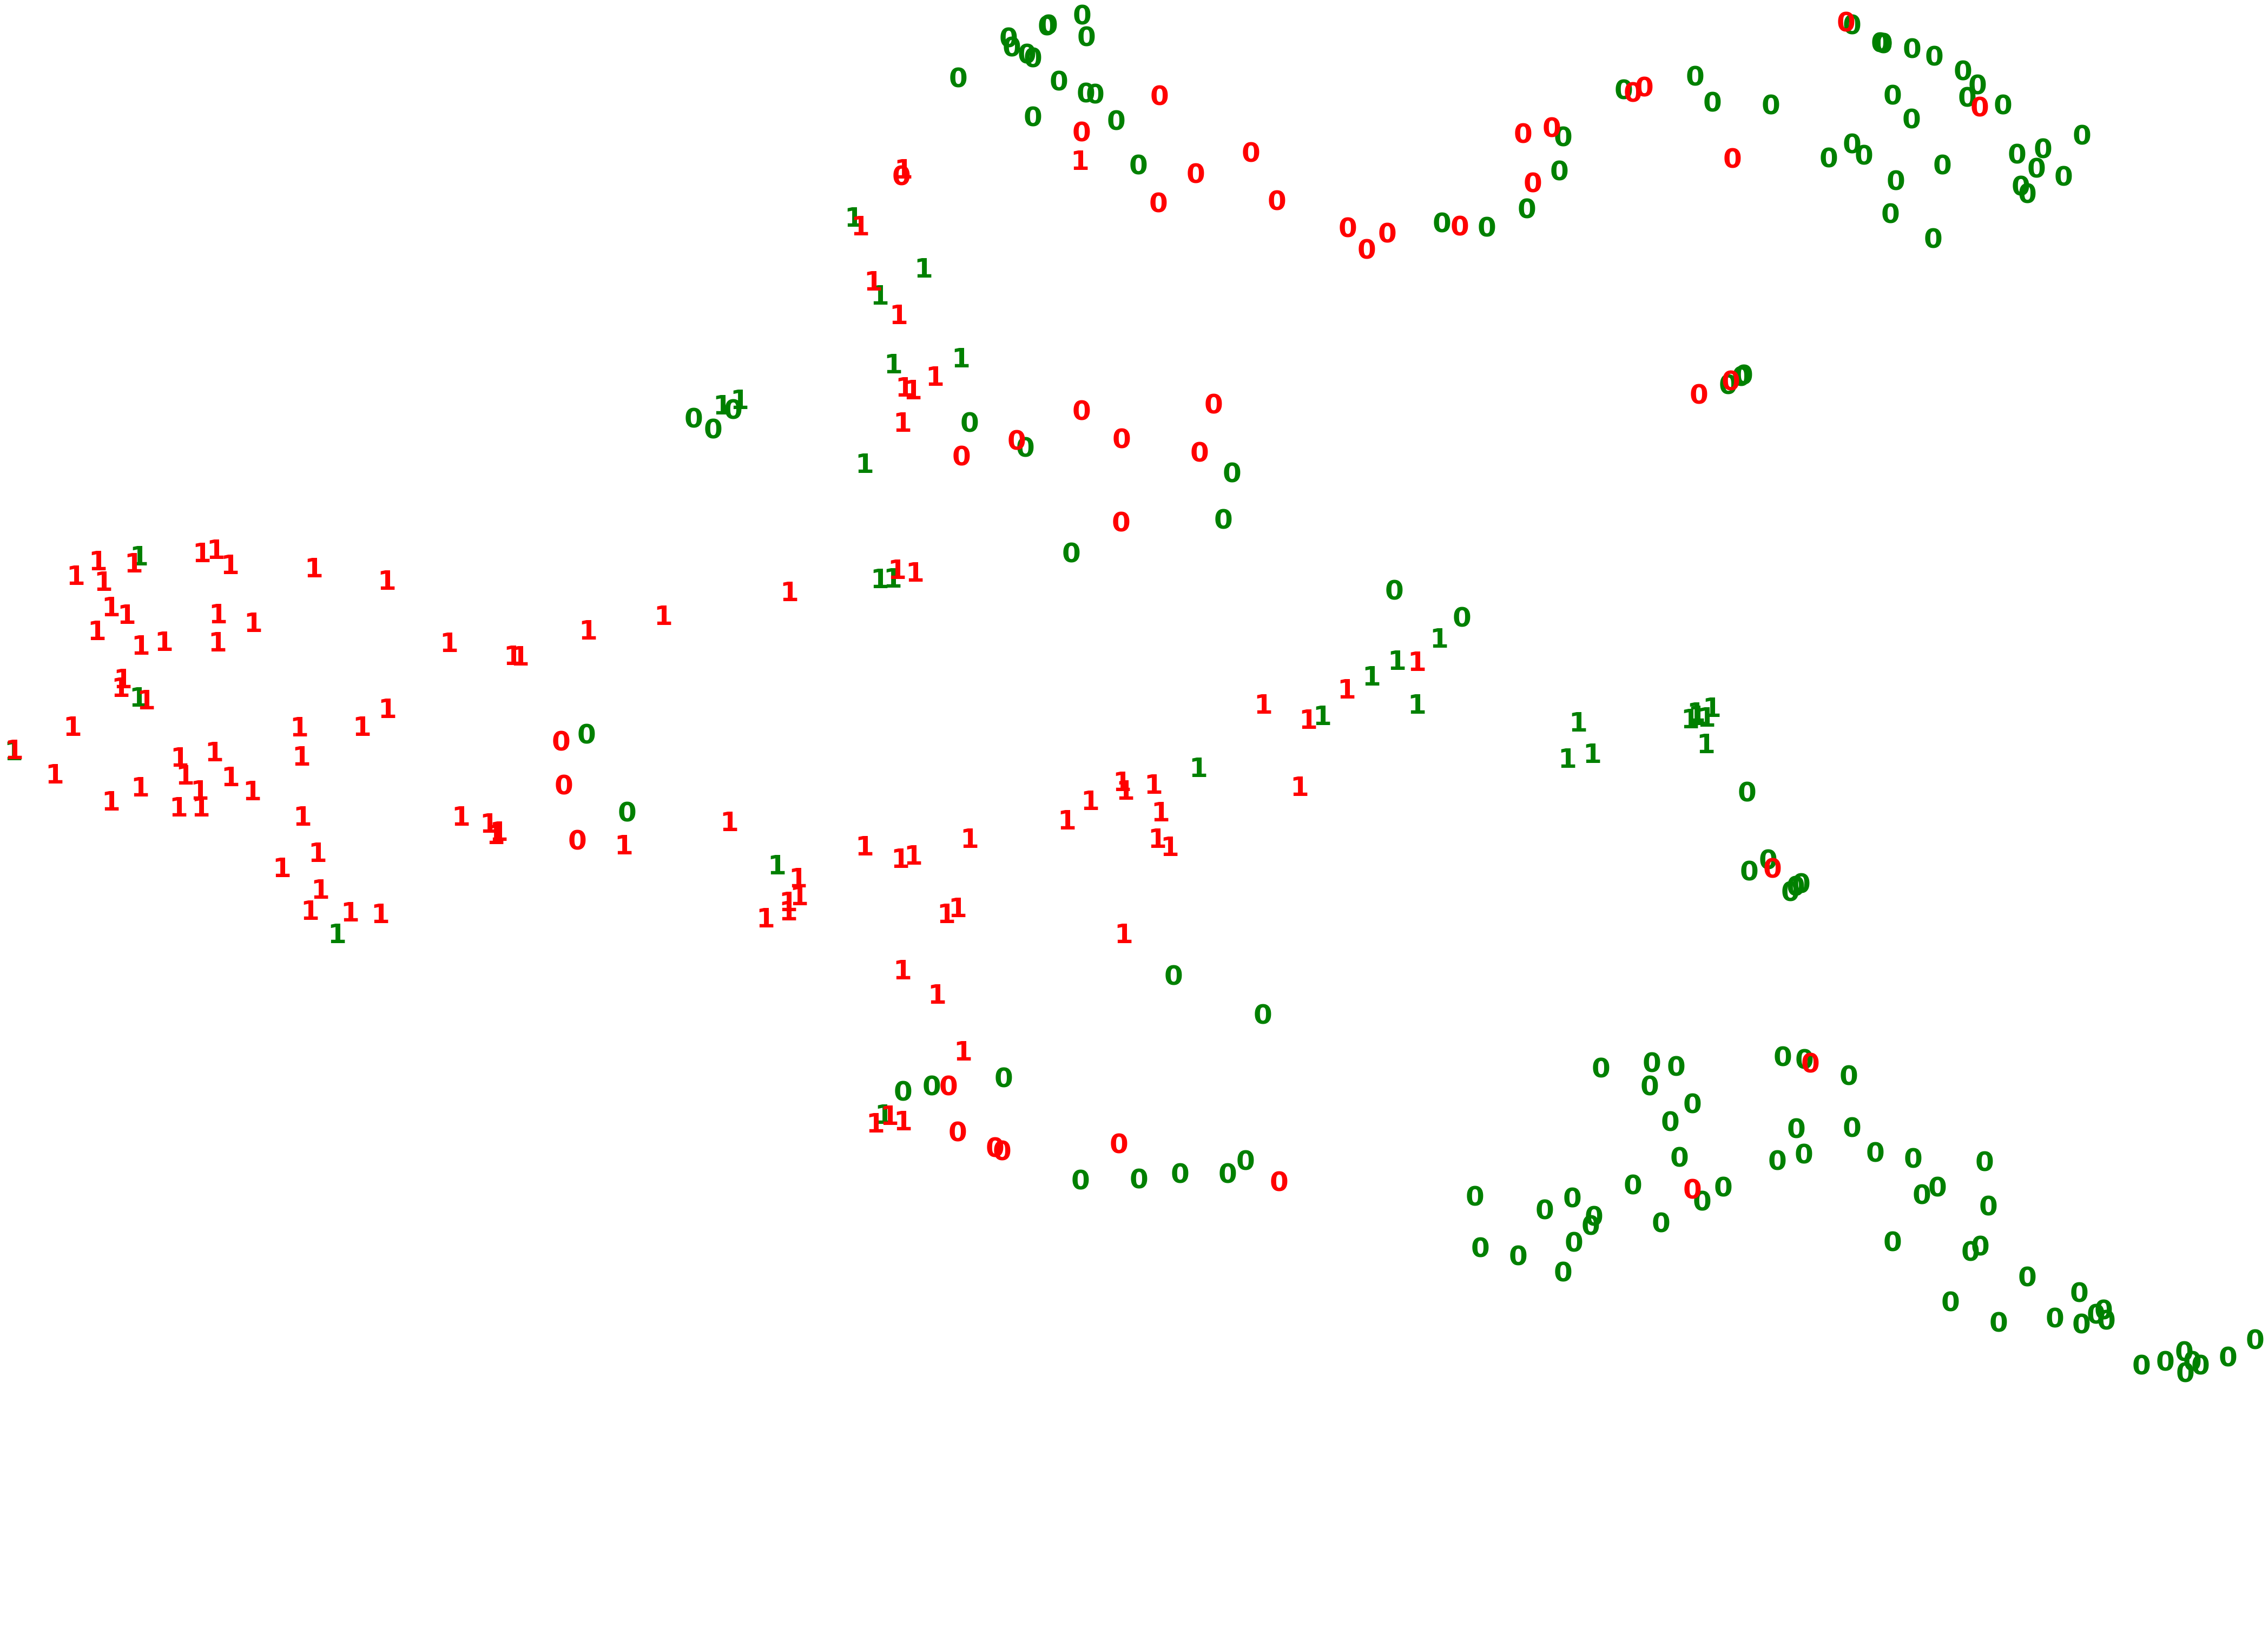

In [67]:
# 2 had the best silhoutte score, lets try plotting it 

agg_cluster = AgglomerativeClustering(linkage= 'complete', affinity = 'cosine', n_clusters = 2)

clusters = agg_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]), #cluster labels 
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

silhoutte score : 0.12927680253460425

Similar to many of the previous models. There is significant overlap between classes, and it is not identifying either of the outcomes accurately.

Lets summarize the findings with a dendrogram 

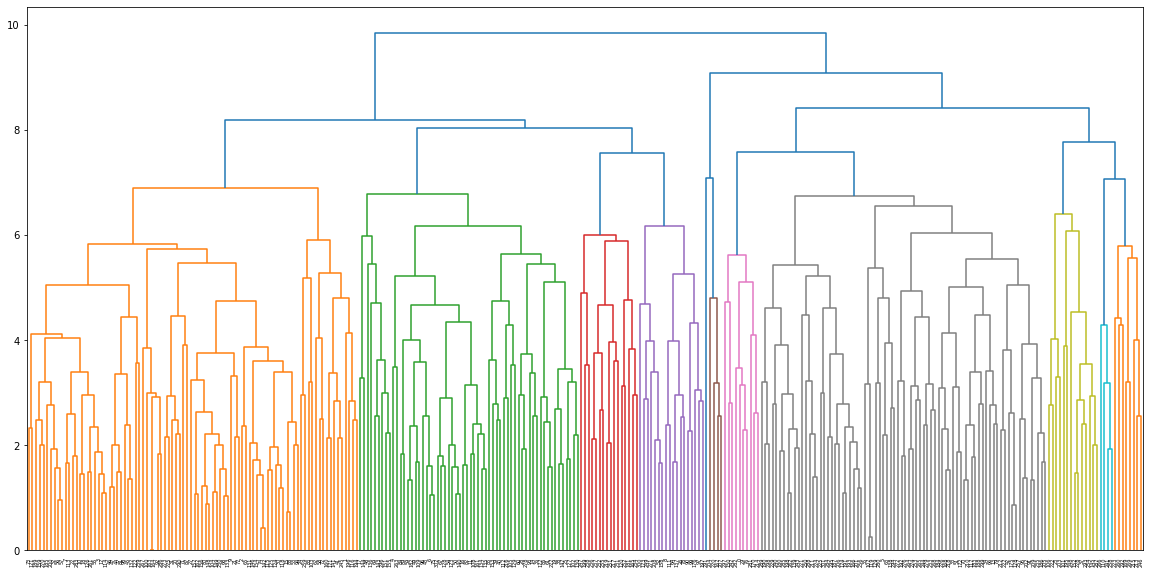

In [63]:
plt.figure(figsize =(20,10))
dendrogram(linkage(X_std, method = 'complete'))
plt.show()

Summary of Silhoutte Scores 


K-means 5 groups                | silhoutte score: 0.11563878826192656
K-means 2 groups                | silhoutte score: 0.16770788750197124

DBSCAN eps = 4.2, n_samples = 7 | silhoutte score: 0.3050747421404568

Gaussian Mixture 3 groups       | silhoutte score: 0.13752639254555918

Hierarchical cluster 2 groups   | silhoutte score: 0.12927680253460425

K-means was the top performing model for the models explored in this dataset. None of the models explored did a particularly good job at seperating distinct groups from one another, or seperating the high risk group from the low risk group. 

Although DBSCAN had the highest silhoutte score of all the models, that score was a result of fitting all of the datapoints to a single group and labeling  a few datapoints as noise. This is not a valuable result at all, and therefore it should not be considered the top performing model. 

I think that k-means 5 cluster was the top model of all the models explored. It produces 5 groups that were fairly seperated and less overlap between groups than other models explored.

K -means 2 group was another top performer. It had the highest silhoutte score of all the legitimate models, and did a fairly good job at producing 2 fully seperated groups. It did not do a good job of seperating the high risk from the lower risk though.  

Ultimately, this dataset was not very well suited to unsupervised learning. The 2 outcomes were nuanced and interspersed, and there was no model that did a good job at seperating them. If this was the goal, then a supervised model would have had a much higher chance at accurately seperatting them. Even the 5 group k-means had a degree of overlapping groups. 

Additionally, I am not surprised that the models were not able to isolate the high risk and lower risk groups. The medical field is a very complicated and naunced field, with numerous experts having to weigh in to create accurate conclusions. Risk factors for heart attack are complicated and multifaceted, and require the insight of experts to make the final decision. That is not to say that these tools arent useful. This dataset only contained roughly 300 replicates, it would be interesting to see if the models would have performed better with a larger dataset. 

I beleive unsupervised learning could be very useful for clustering large medical datasets and learning about groups of people. By clustering groups of people and examining outcomes on their health, we could advance wellness and medical treatments.  



Works cited 

BENJAMIN, E. J., BLAHA, M. J., CHIUVE, S. E., CUSHMAN, M., DAS, S. R., DEO, R., DE FERRANTI, S. D., FLOYD, J., FORNAGE, M. & GILLESPIE, C. 2017. Heart disease and stroke statistics—2017 update: a report from the American Heart Association. circulation, 135, e146-e603.

European Society of Cardiology. "Diabetes and heart attack is a particularly risky combination." ScienceDaily. ScienceDaily, 3 September 2019. <www.sciencedaily.com/releases/2019/09/190903084049.htm>.

LANZA, G. A., MUSTILLI, M., SESTITO, A., INFUSINO, F., SGUEGLIA, G. & CREA, F. 2004. Diagnostic and prognostic value of ST segment depression limited to the recovery phase of exercise stress test. Heart, 90, 1417-1421.


